In [1]:
import os, json
import pandas as pd
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

path_to_json = 'departements-france/'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
print(json_files)  # for me this prints ['foo.json']

['departements-france-2020-03-01.json', 'departements-france-2020-03-02.json', 'departements-france-2020-03-03.json', 'departements-france-2020-03-04.json', 'departements-france-2020-03-05.json', 'departements-france-2020-03-06.json', 'departements-france-2020-03-07.json', 'departements-france-2020-03-08.json', 'departements-france-2020-03-09.json', 'departements-france-2020-03-10.json', 'departements-france-2020-03-11.json', 'departements-france-2020-03-12.json', 'departements-france-2020-03-13.json', 'departements-france-2020-03-14.json', 'departements-france-2020-03-15.json', 'departements-france-2020-03-16.json', 'departements-france-2020-03-17.json', 'departements-france-2020-03-18.json', 'departements-france-2020-03-19.json', 'departements-france-2020-03-20.json', 'departements-france-2020-03-21.json', 'departements-france-2020-03-22.json', 'departements-france-2020-03-23.json', 'departements-france-2020-03-24.json', 'departements-france-2020-03-25.json', 'departements-france-202

In [2]:
def CreateJsonFileNormalised(data, filename) : 
    df = pd.json_normalize(data['features'])
    df = df.drop(columns=['type',
                            'properties.Country/Region',
                            'properties.Population.Under19', 
                            'properties.Population.Under39', 
                            'properties.Population.Under59', 
                            'properties.Population.Under74', 
                            'properties.Population.Over75',
                            'geometry.type',
                            'geometry.coordinates',
                           ])
    
    if not 'properties.Deaths' in df.columns:
        df['properties.Deaths'] = '0'
    if not 'properties.Recovered' in df.columns:
        df['properties.Recovered'] = '0'
    if not 'properties.Severe' in df.columns:
        df['properties.Severe'] = '0'
    if not 'properties.Critical' in df.columns:
        df['properties.Critical'] = '0'
    if not 'properties.Emergencies.Suspected/Accumulated' in df.columns:
        df['properties.Emergencies.Suspected/Accumulated'] = '0'
    if not 'properties.Emergencies.Total/Accumulated' in df.columns:
        df['properties.Emergencies.Total/Accumulated'] = '0'
    if not 'properties.Emergencies.Severe/Accumulated' in df.columns:
        df['properties.Emergencies.Severe/Accumulated'] = '0'
    if not 'properties.MedicalActs.Suspected' in df.columns:
        df['properties.MedicalActs.Suspected'] = '0'
    if not 'properties.MedicalActs.Suspected/Accumulated' in df.columns:
        df['properties.MedicalActs.Suspected/Accumulated'] = '0' 
    if not 'properties.MedicalActs.Total/Accumulated' in df.columns:
        df['properties.MedicalActs.Total/Accumulated'] = '0'
    if not 'properties.Confirmed' in df.columns:
        df['properties.Confirmed'] = '0' 
    if not 'properties.MedicalTests.Total/Accumulated' in df.columns:
        df['properties.MedicalTests.Total/Accumulated'] = '0'
    if not 'properties.MedicalTests.Confirmed/Accumulated' in df.columns:
        df['properties.MedicalTests.Confirmed/Accumulated'] = '0'
        
    df = df.fillna(0) 
    allEntry={}
    for index, row in df.iterrows():
        entry = {
          'Province/State': row['properties.Province/State'],
          'Code': row['properties.Code'],
          'Population': row['properties.Population.Total'],
          'Beds': {'Resuscitation': row['properties.Beds.Resuscitation'], 'IntensiveCare': row['properties.Beds.IntensiveCare'], 'Total': row['properties.Beds.Total']},
          'Deaths': row['properties.Deaths'],
          'Recovered': row['properties.Recovered'],
          'Severe': row['properties.Severe'],
          'Critical': row['properties.Critical'],
          'Emergencies': {'Suspected': row['properties.Emergencies.Suspected'],
           'Total': row['properties.Emergencies.Total'],
           'Severe': row['properties.Emergencies.Severe'],
           'Suspected/Accumulated': row['properties.Emergencies.Suspected/Accumulated'],
           'Total/Accumulated': row['properties.Emergencies.Total/Accumulated'],
           'Severe/Accumulated': row['properties.Emergencies.Severe/Accumulated']},
          'MedicalActs': {'Suspected': row['properties.MedicalActs.Suspected'],
           'Total': row['properties.MedicalActs.Total'],
           'Suspected/Accumulated': row['properties.MedicalActs.Suspected/Accumulated'],
           'Total/Accumulated': row['properties.MedicalActs.Total/Accumulated']},
          'Confirmed': row['properties.Confirmed'],
          'MedicalTests': {'Total/Accumulated': row['properties.MedicalTests.Total/Accumulated'], 'Confirmed/Accumulated': row['properties.MedicalTests.Confirmed/Accumulated']}
        }
        allEntry[index] = entry
    jsonData = json.dumps(allEntry)
    print(filename)
    #traitement du jsonData ICI 
    
    kmeans = KMeans(n_clusters=6, init='k-means++')
    kmeans.fit(df[['properties.Population.Total', 'properties.Deaths']])
    centroids = kmeans.cluster_centers_
    plt.scatter(df['properties.Population.Total'], df['properties.Deaths'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
    print("Death/Total")
    plt.show()
    
    kmeans = KMeans(n_clusters=6, init='k-means++')
    kmeans.fit(df[['properties.Recovered', 'properties.Deaths']])
    centroids = kmeans.cluster_centers_
    plt.scatter(df['properties.Recovered'], df['properties.Deaths'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
    print("Death/Recovered")
    plt.show()

departements-france-2020-03-01.json
Death/Total


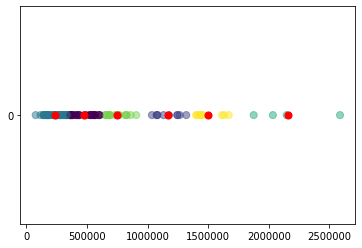

Death/Recovered


D:\Users\Whiteyeas\anaconda3\lib\site-packages\ipykernel_launcher.py:80: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (6). Possibly due to duplicate points in X.


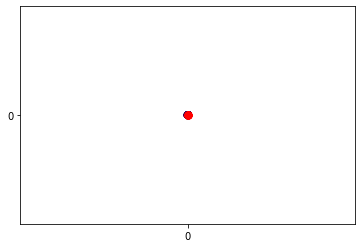

departements-france-2020-03-02.json
Death/Total


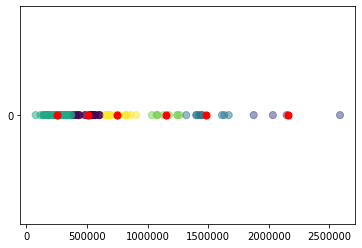

Death/Recovered


D:\Users\Whiteyeas\anaconda3\lib\site-packages\ipykernel_launcher.py:80: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (6). Possibly due to duplicate points in X.


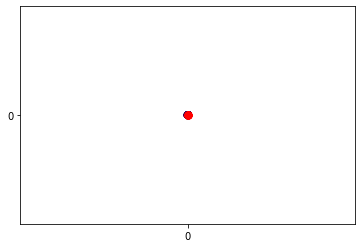

departements-france-2020-03-03.json
Death/Total


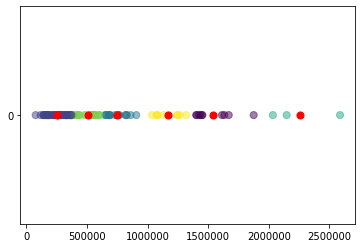

Death/Recovered


D:\Users\Whiteyeas\anaconda3\lib\site-packages\ipykernel_launcher.py:80: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (6). Possibly due to duplicate points in X.


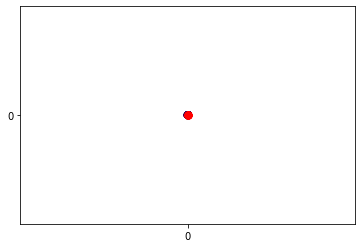

departements-france-2020-03-04.json
Death/Total


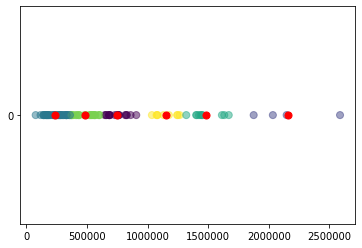

Death/Recovered


D:\Users\Whiteyeas\anaconda3\lib\site-packages\ipykernel_launcher.py:80: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.


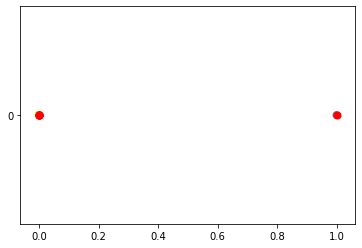

departements-france-2020-03-05.json
Death/Total


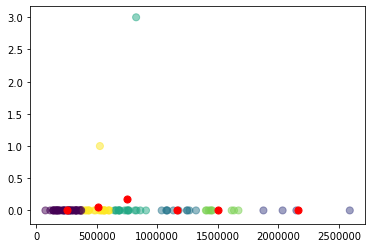

Death/Recovered


D:\Users\Whiteyeas\anaconda3\lib\site-packages\ipykernel_launcher.py:80: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.


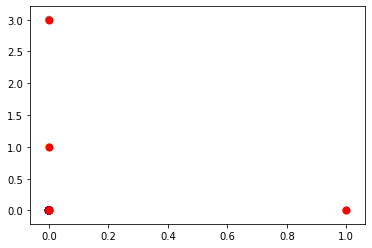

departements-france-2020-03-06.json
Death/Total


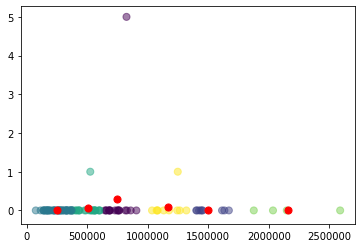

Death/Recovered


D:\Users\Whiteyeas\anaconda3\lib\site-packages\ipykernel_launcher.py:80: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.


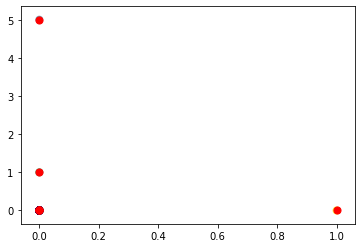

departements-france-2020-03-07.json
Death/Total


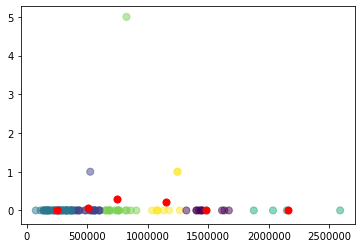

Death/Recovered


D:\Users\Whiteyeas\anaconda3\lib\site-packages\ipykernel_launcher.py:80: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.


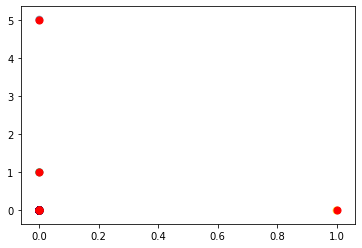

departements-france-2020-03-08.json
Death/Total


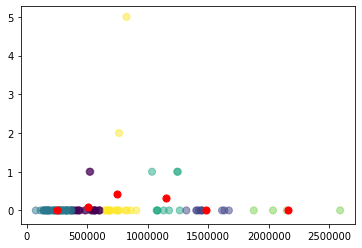

Death/Recovered


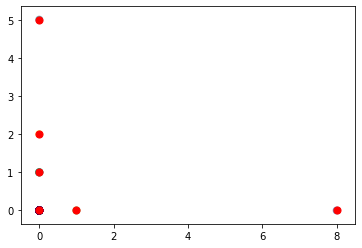

departements-france-2020-03-09.json
Death/Total


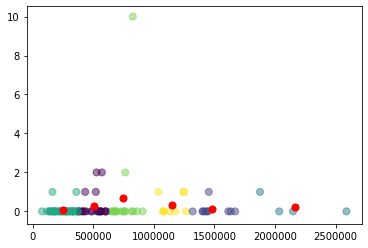

Death/Recovered


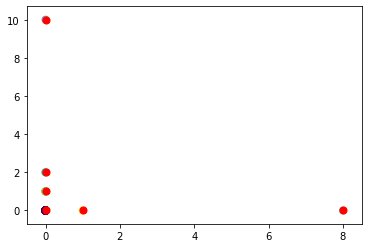

departements-france-2020-03-10.json
Death/Total


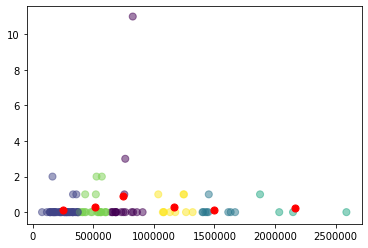

Death/Recovered


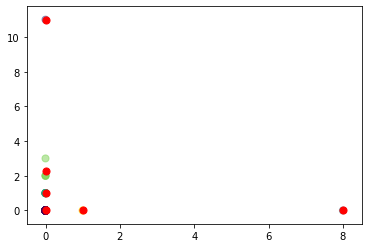

departements-france-2020-03-11.json
Death/Total


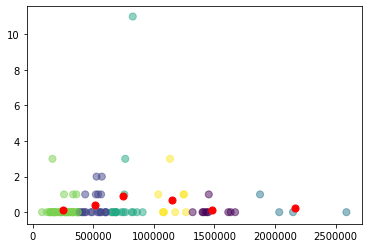

Death/Recovered


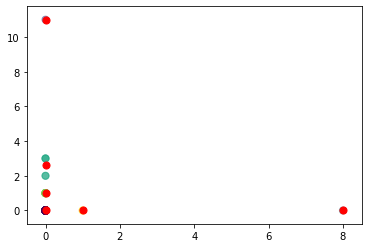

departements-france-2020-03-12.json
Death/Total


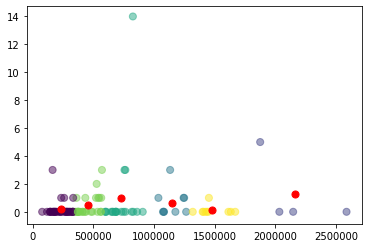

Death/Recovered


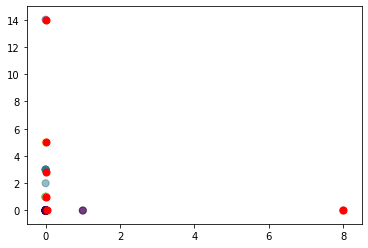

departements-france-2020-03-13.json
Death/Total


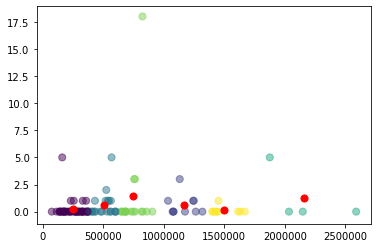

Death/Recovered


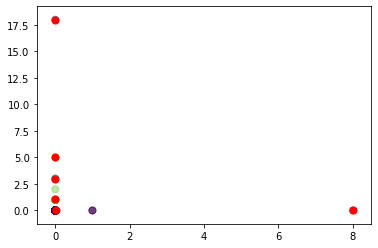

departements-france-2020-03-14.json
Death/Total


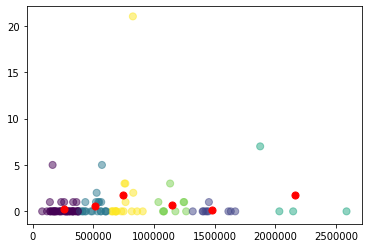

Death/Recovered


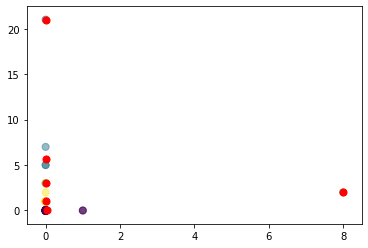

departements-france-2020-03-15.json
Death/Total


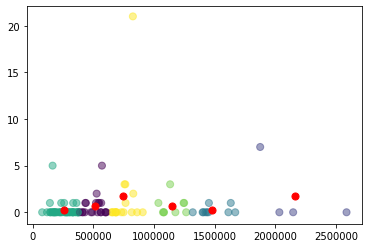

Death/Recovered


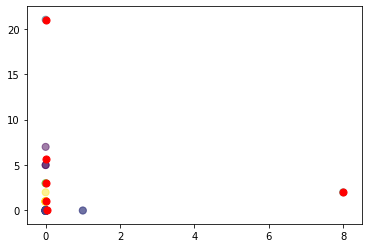

departements-france-2020-03-16.json
Death/Total


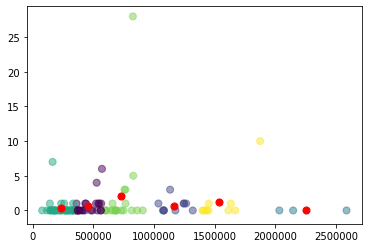

Death/Recovered


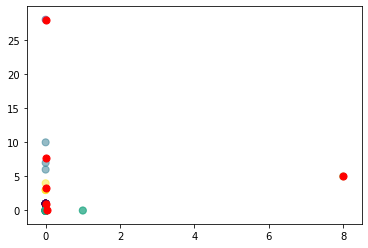

departements-france-2020-03-17.json
Death/Total


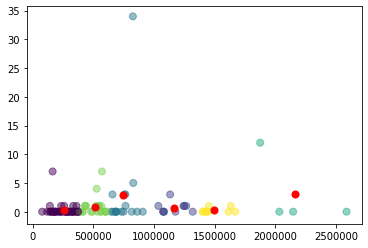

Death/Recovered


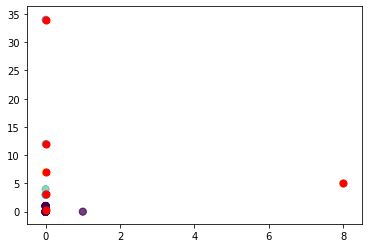

departements-france-2020-03-18.json
Death/Total


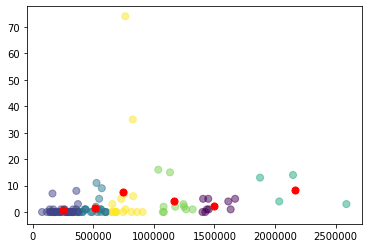

Death/Recovered


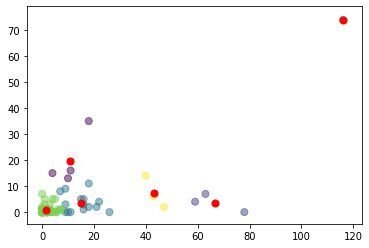

departements-france-2020-03-19.json
Death/Total


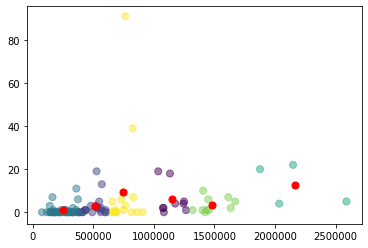

Death/Recovered


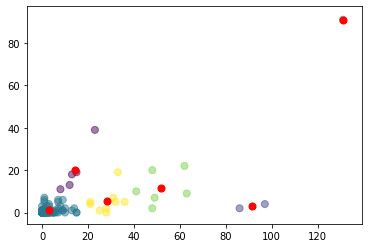

departements-france-2020-03-20.json
Death/Total


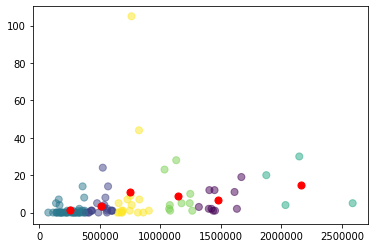

Death/Recovered


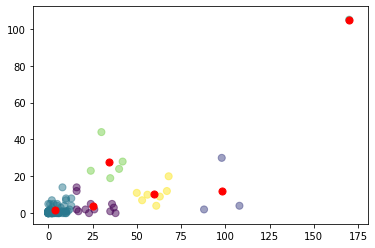

departements-france-2020-03-21.json
Death/Total


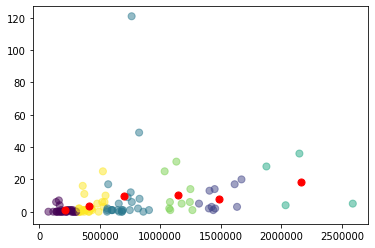

Death/Recovered


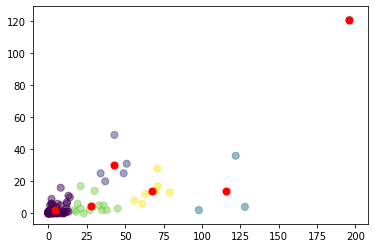

departements-france-2020-03-22.json
Death/Total


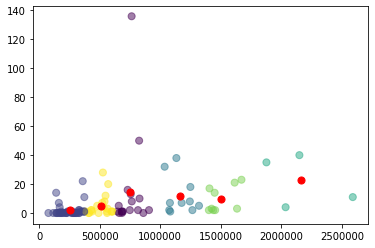

Death/Recovered


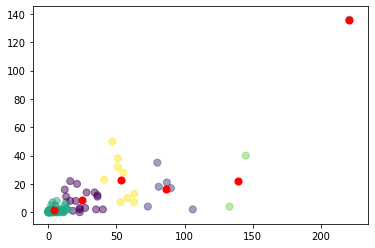

departements-france-2020-03-23.json
Death/Total


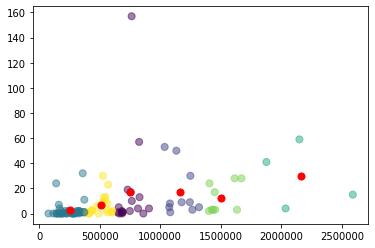

Death/Recovered


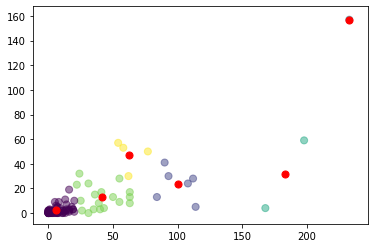

departements-france-2020-03-24.json
Death/Total


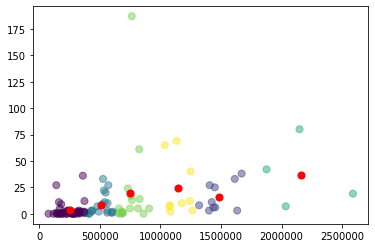

Death/Recovered


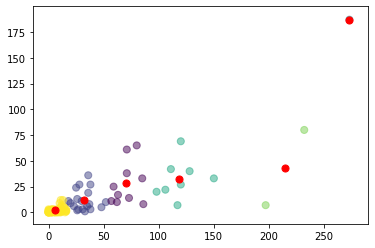

departements-france-2020-03-25.json
Death/Total


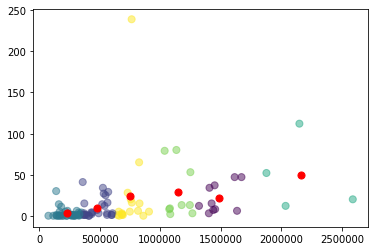

Death/Recovered


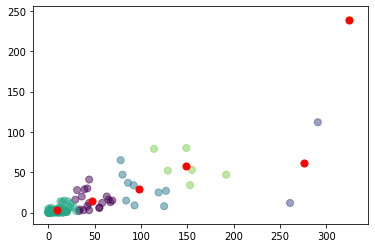

departements-france-2020-03-26.json
Death/Total


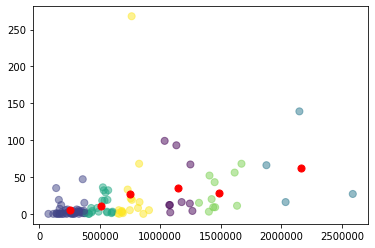

Death/Recovered


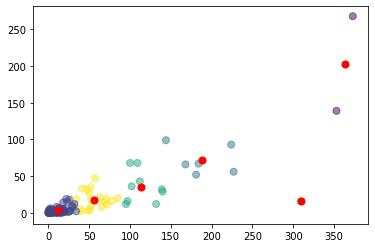

departements-france-2020-03-27.json
Death/Total


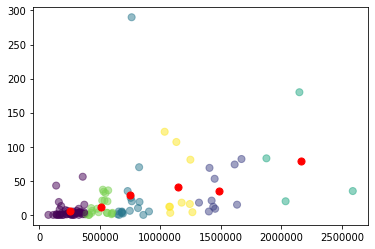

Death/Recovered


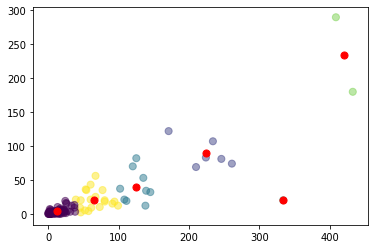

departements-france-2020-03-28.json
Death/Total


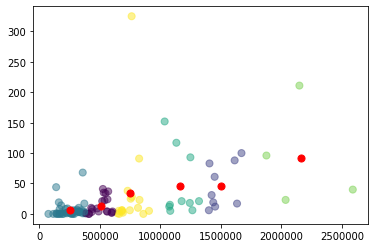

Death/Recovered


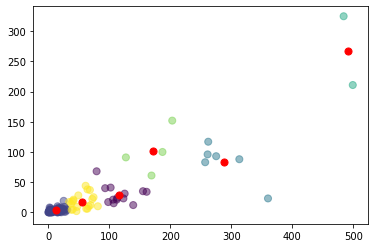

departements-france-2020-03-29.json
Death/Total


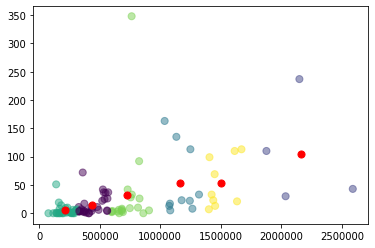

Death/Recovered


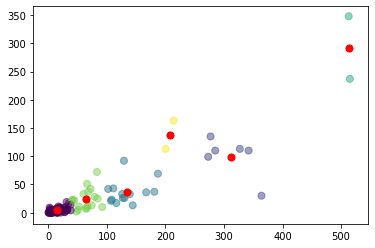

departements-france-2020-03-30.json
Death/Total


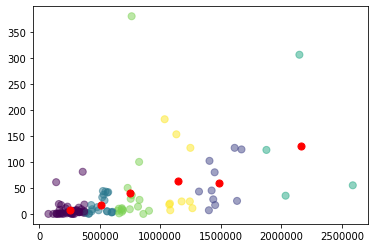

Death/Recovered


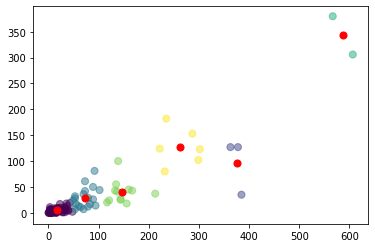

departements-france-2020-03-31.json
Death/Total


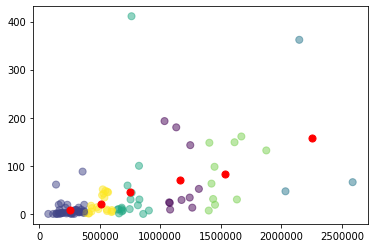

Death/Recovered


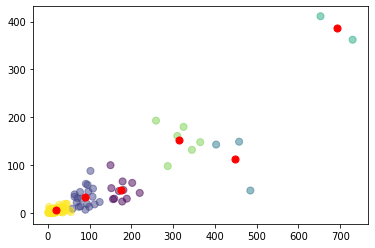

departements-france-2020-04-01.json
Death/Total


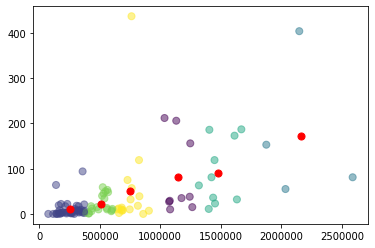

Death/Recovered


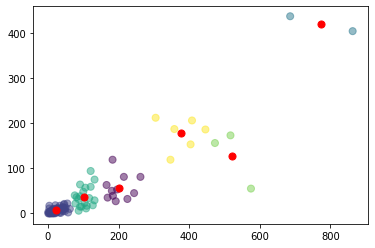

departements-france-2020-04-02.json
Death/Total


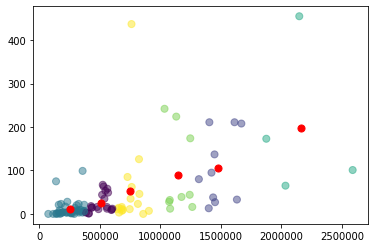

Death/Recovered


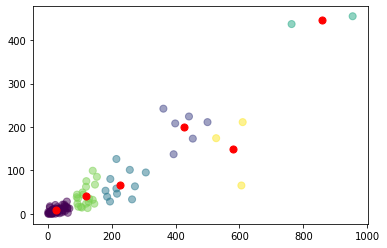

departements-france-2020-04-03.json
Death/Total


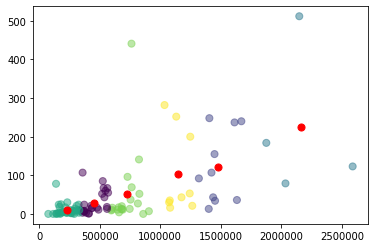

Death/Recovered


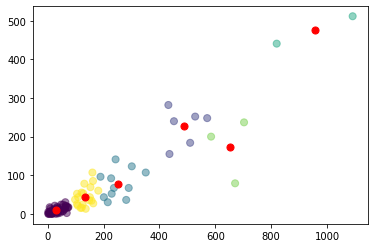

departements-france-2020-04-04.json
Death/Total


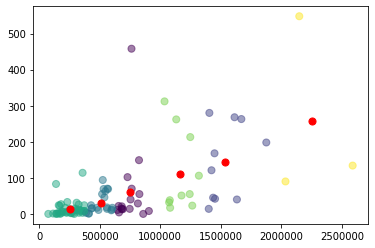

Death/Recovered


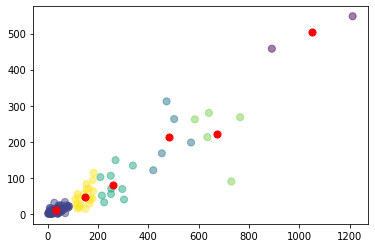

departements-france-2020-04-05.json
Death/Total


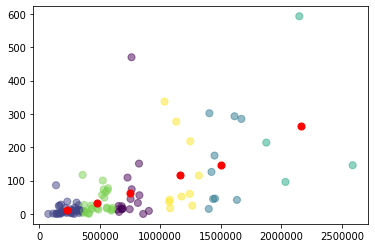

Death/Recovered


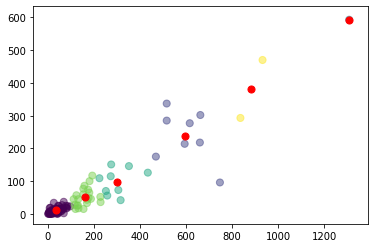

departements-france-2020-04-06.json
Death/Total


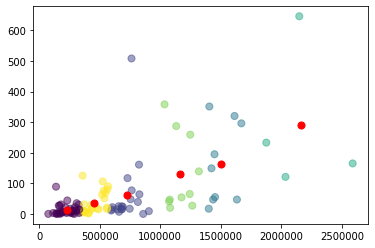

Death/Recovered


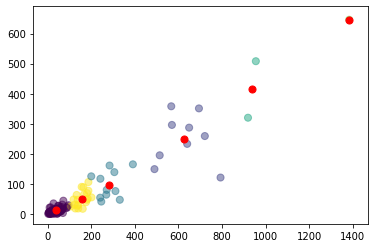

departements-france-2020-04-07.json
Death/Total


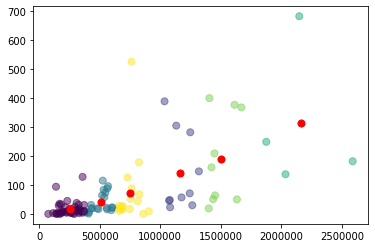

Death/Recovered


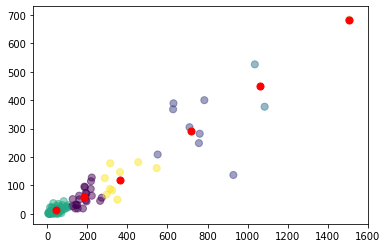

departements-france-2020-04-08.json
Death/Total


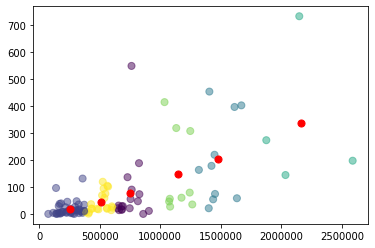

Death/Recovered


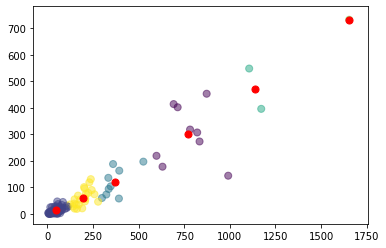

departements-france-2020-04-09.json
Death/Total


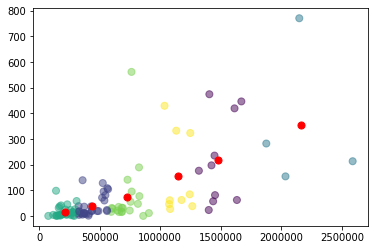

Death/Recovered


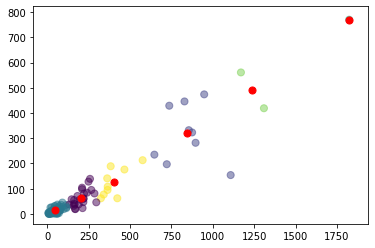

departements-france-2020-04-10.json
Death/Total


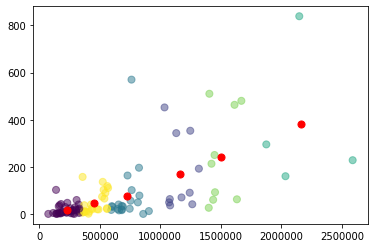

Death/Recovered


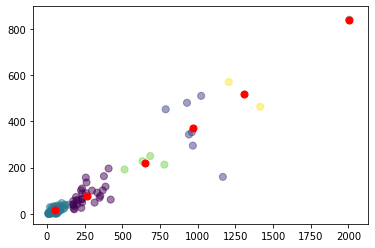

departements-france-2020-04-11.json
Death/Total


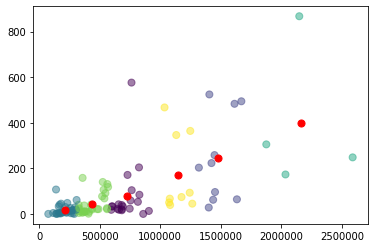

Death/Recovered


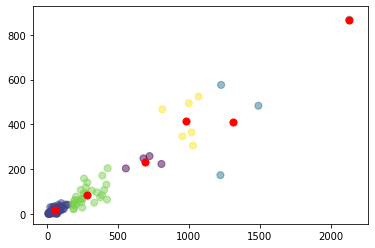

departements-france-2020-04-12.json
Death/Total


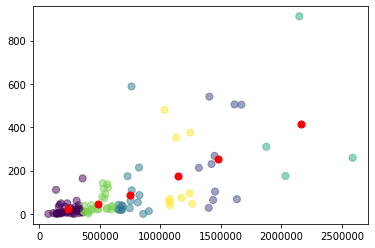

Death/Recovered


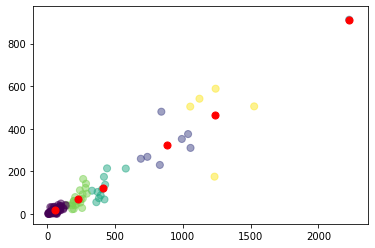

departements-france-2020-04-13.json
Death/Total


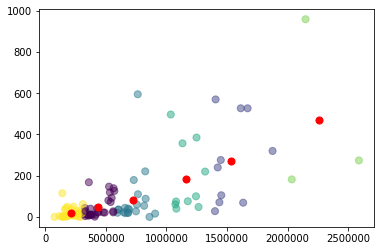

Death/Recovered


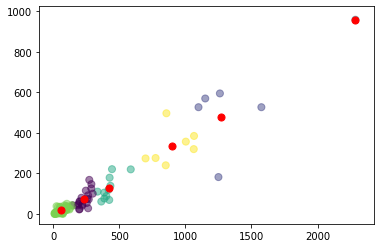

departements-france-2020-04-14.json
Death/Total


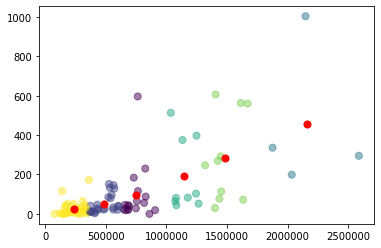

Death/Recovered


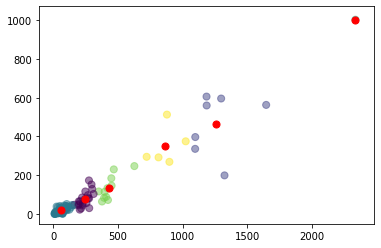

departements-france-2020-04-15.json
Death/Total


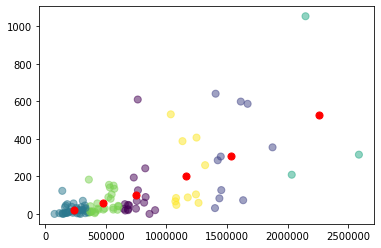

Death/Recovered


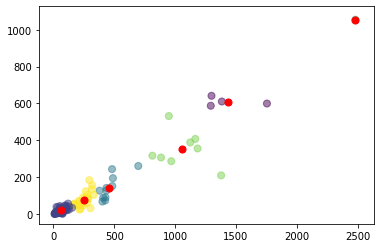

departements-france-2020-04-16.json
Death/Total


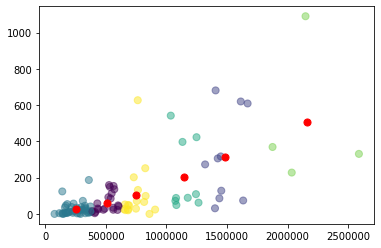

Death/Recovered


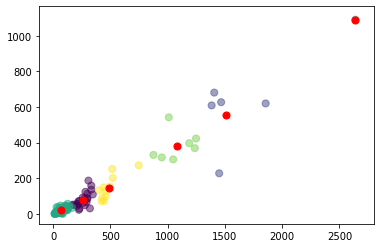

departements-france-2020-04-17.json
Death/Total


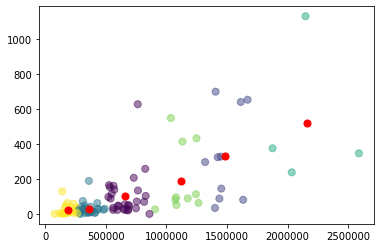

Death/Recovered


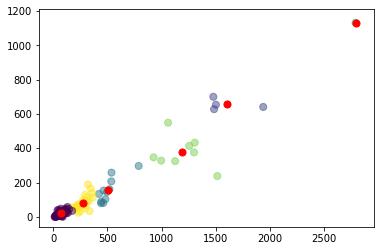

departements-france-2020-04-18.json
Death/Total


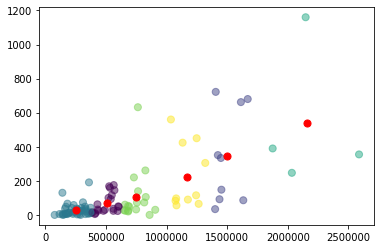

Death/Recovered


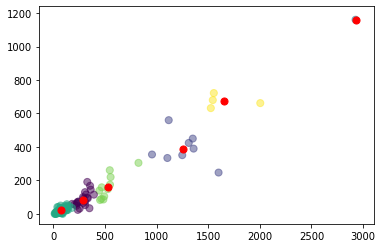

departements-france-2020-04-19.json
Death/Total


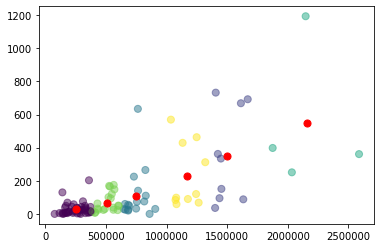

Death/Recovered


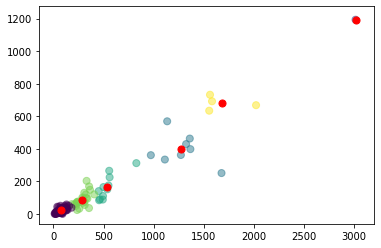

departements-france-2020-04-20.json
Death/Total


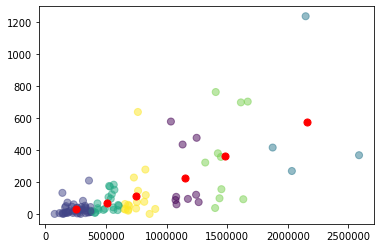

Death/Recovered


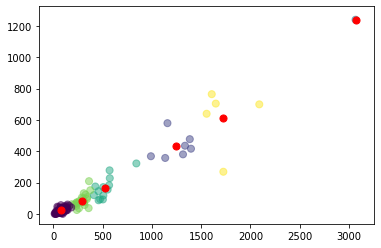

departements-france-2020-04-21.json
Death/Total


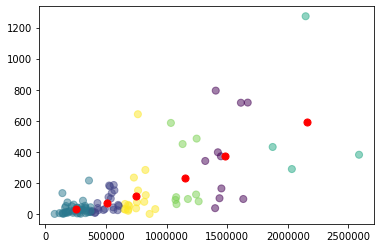

Death/Recovered


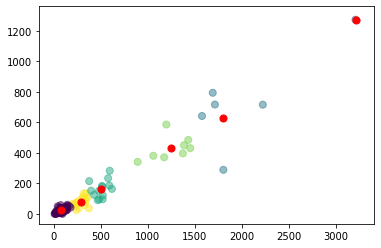

departements-france-2020-04-22.json
Death/Total


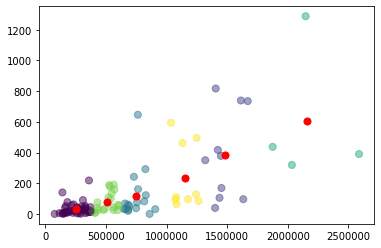

Death/Recovered


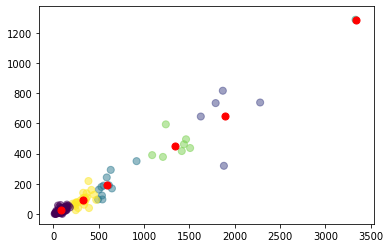

departements-france-2020-04-23.json
Death/Total


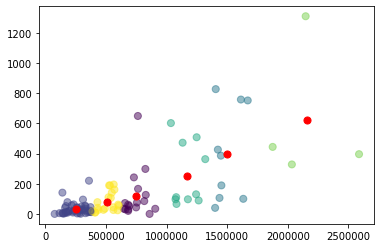

Death/Recovered


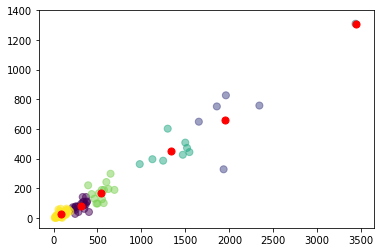

departements-france-2020-04-24.json
Death/Total


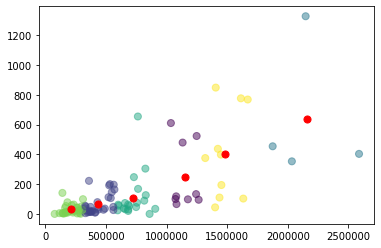

Death/Recovered


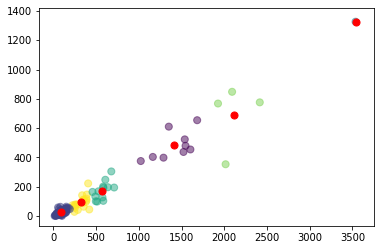

departements-france-2020-04-25.json
Death/Total


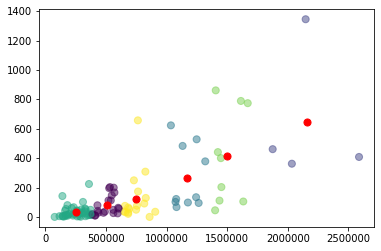

Death/Recovered


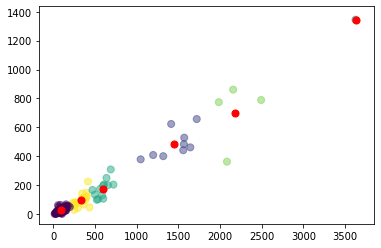

departements-france-2020-04-26.json
Death/Total


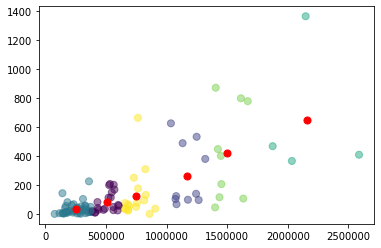

Death/Recovered


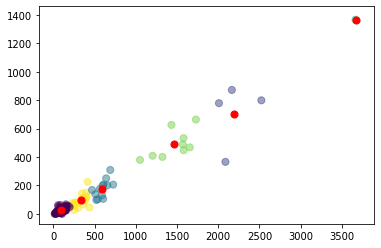

departements-france-2020-04-27.json
Death/Total


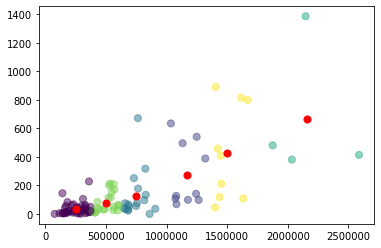

Death/Recovered


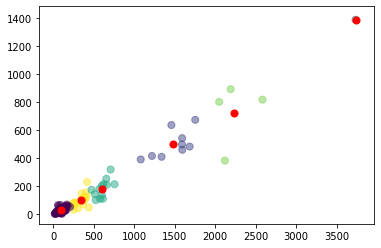

departements-france-2020-04-28.json
Death/Total


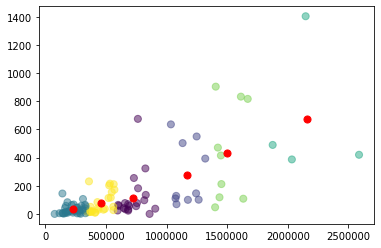

Death/Recovered


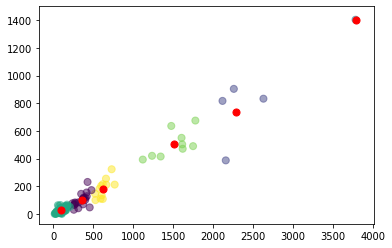

departements-france-2020-04-29.json
Death/Total


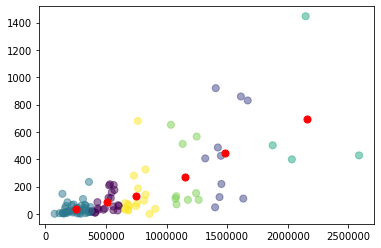

Death/Recovered


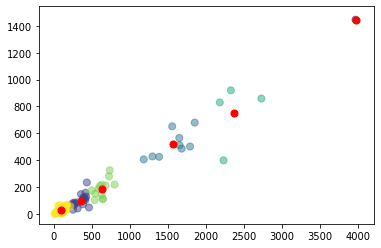

departements-france-2020-04-30.json
Death/Total


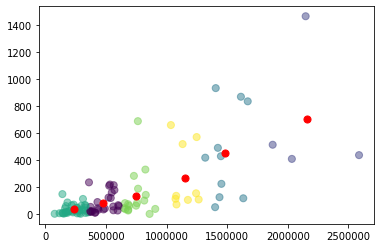

Death/Recovered


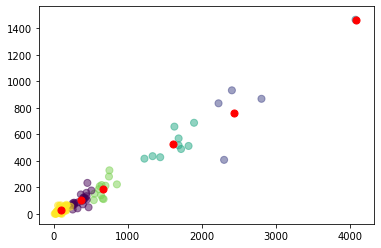

departements-france-2020-05-01.json
Death/Total


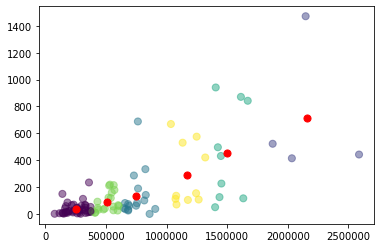

Death/Recovered


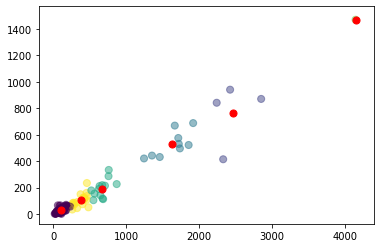

departements-france-2020-05-02.json
Death/Total


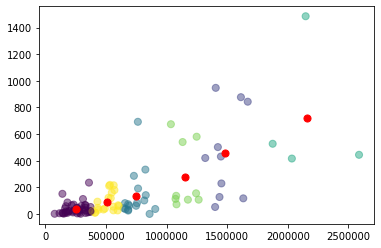

Death/Recovered


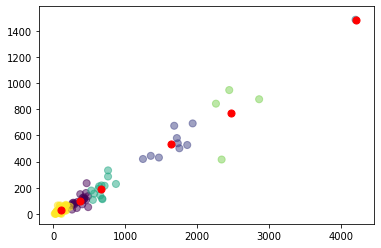

departements-france-2020-05-03.json
Death/Total


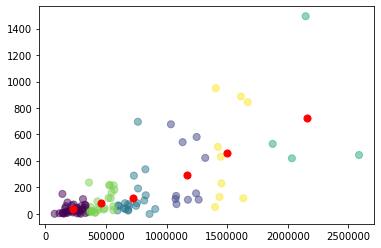

Death/Recovered


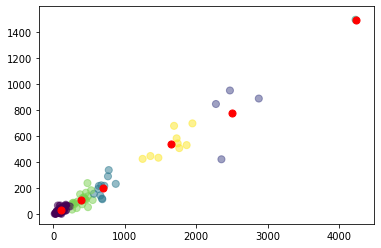

departements-france-2020-05-04.json
Death/Total


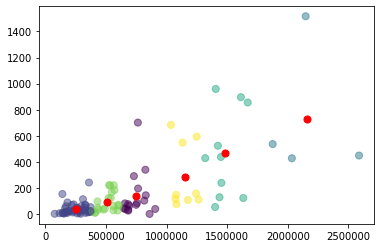

Death/Recovered


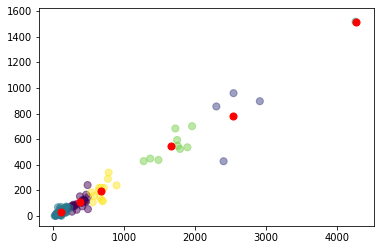

departements-france-2020-05-05.json
Death/Total


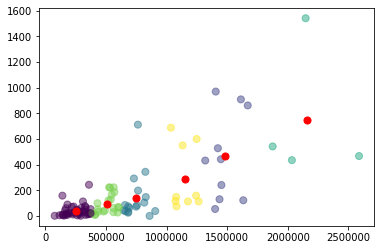

Death/Recovered


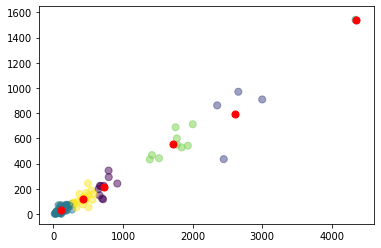

departements-france-2020-05-06.json
Death/Total


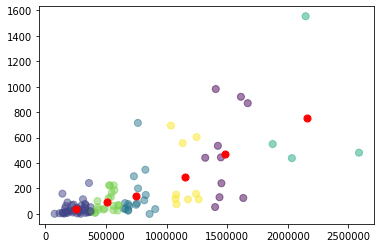

Death/Recovered


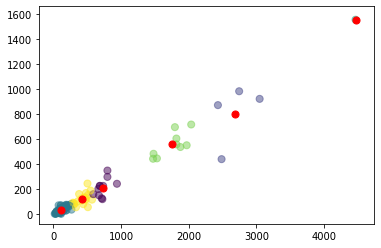

departements-france-2020-05-07.json
Death/Total


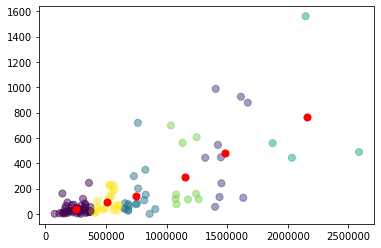

Death/Recovered


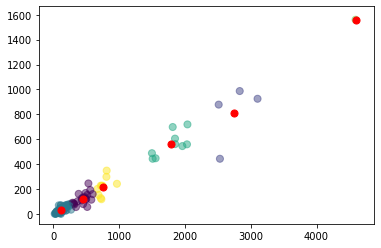

departements-france-2020-05-08.json
Death/Total


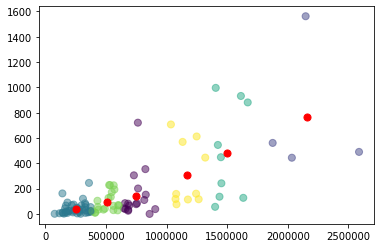

Death/Recovered


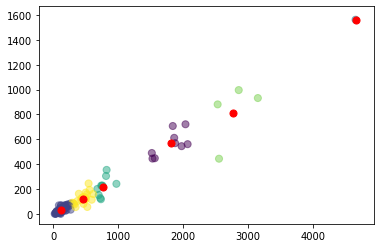

departements-france-2020-05-09.json
Death/Total


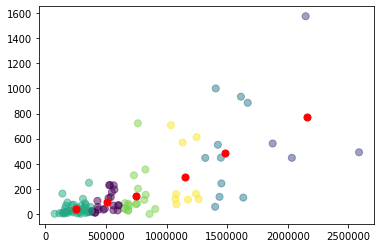

Death/Recovered


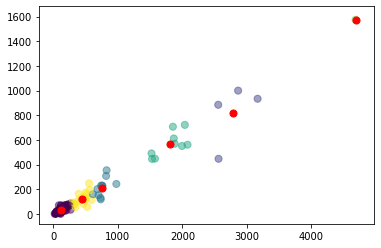

departements-france-2020-05-10.json
Death/Total


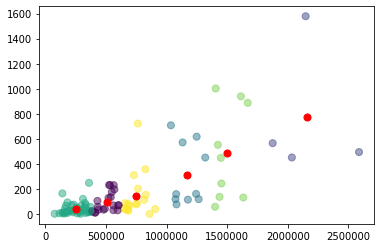

Death/Recovered


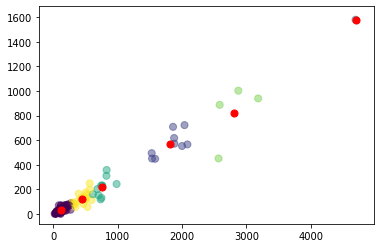

departements-france-2020-05-11.json
Death/Total


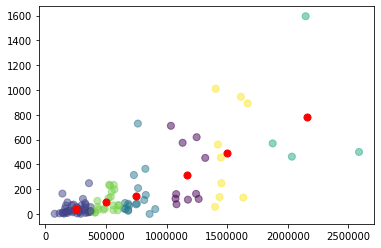

Death/Recovered


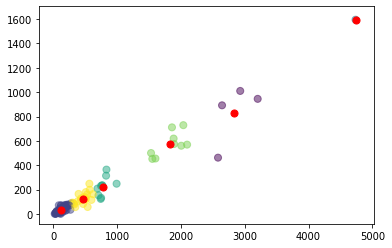

departements-france-2020-05-12.json
Death/Total


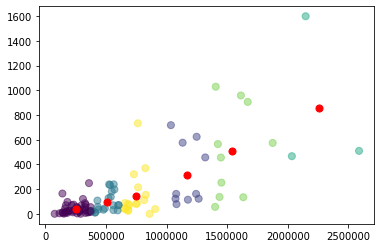

Death/Recovered


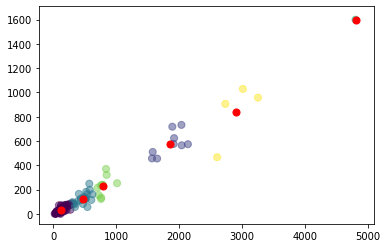

departements-france-2020-05-13.json
Death/Total


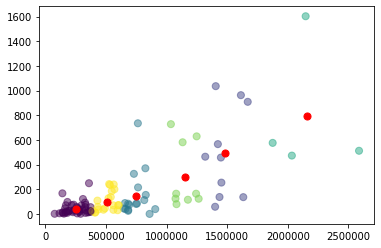

Death/Recovered


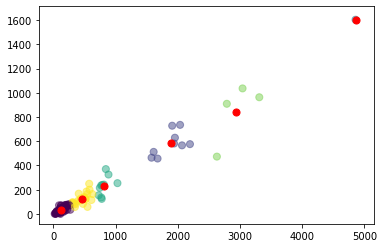

departements-france-2020-05-14.json
Death/Total


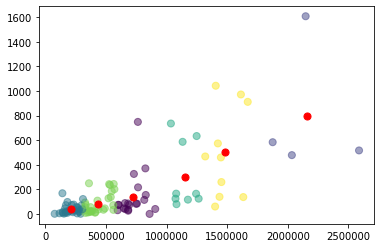

Death/Recovered


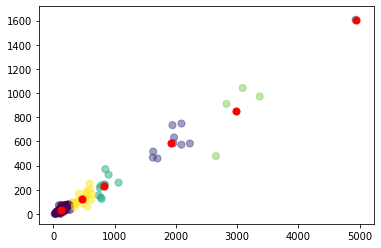

departements-france-2020-05-15.json
Death/Total


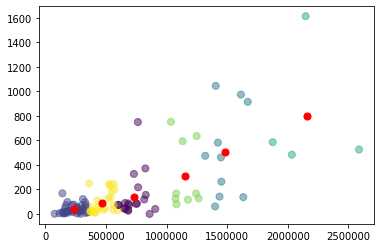

Death/Recovered


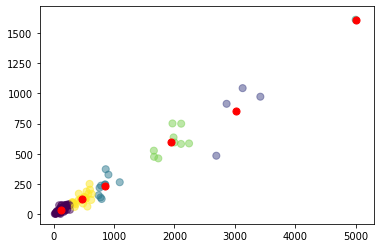

departements-france-2020-05-16.json
Death/Total


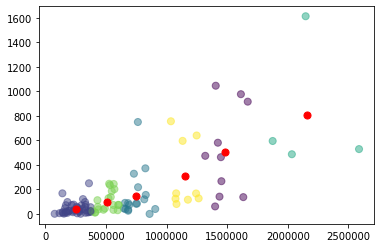

Death/Recovered


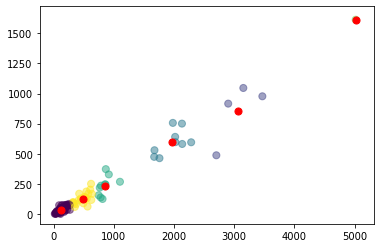

departements-france-2020-05-17.json
Death/Total


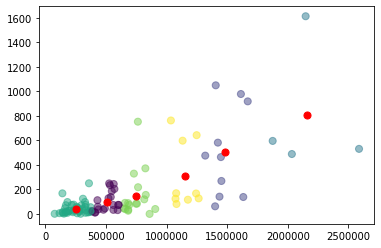

Death/Recovered


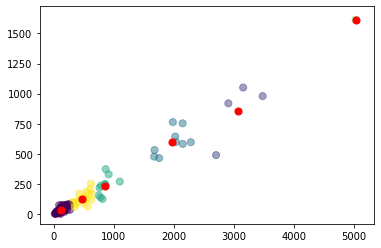

departements-france-2020-05-18.json
Death/Total


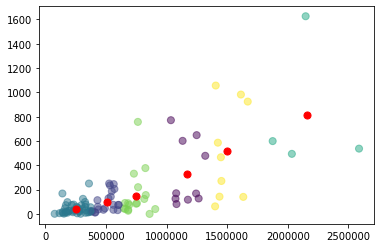

Death/Recovered


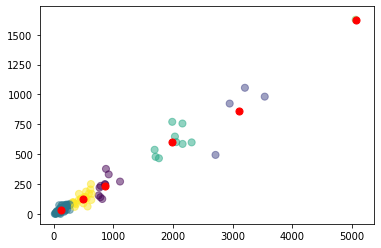

departements-france-2020-05-19.json
Death/Total


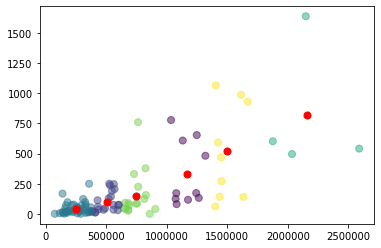

Death/Recovered


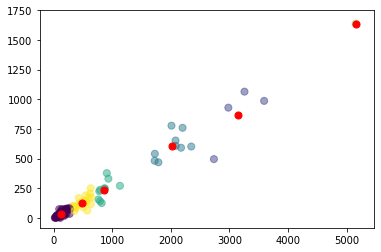

departements-france-2020-05-20.json
Death/Total


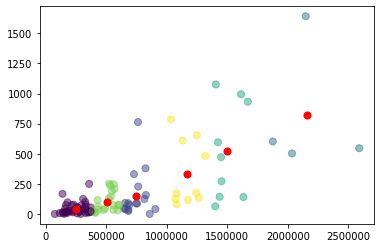

Death/Recovered


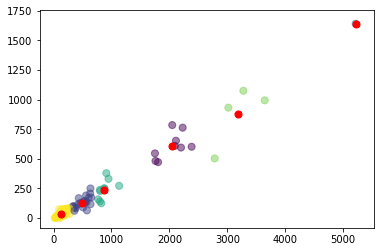

departements-france-2020-05-21.json
Death/Total


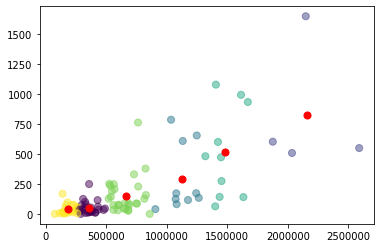

Death/Recovered


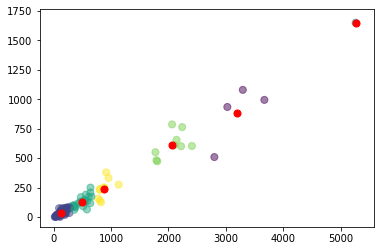

departements-france-2020-05-22.json
Death/Total


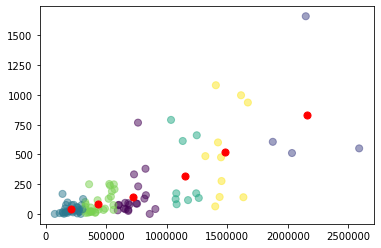

Death/Recovered


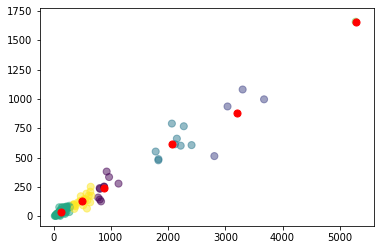

departements-france-2020-05-23.json
Death/Total


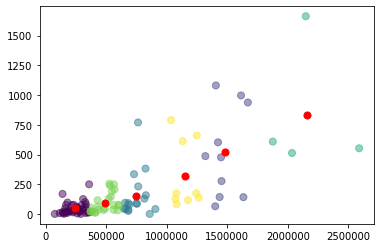

Death/Recovered


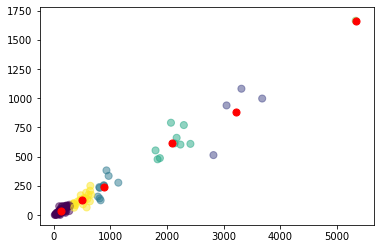

departements-france-2020-05-24.json
Death/Total


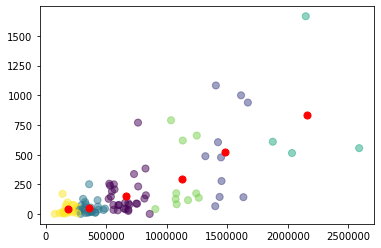

Death/Recovered


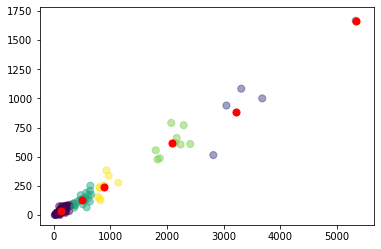

departements-france-2020-05-25.json
Death/Total


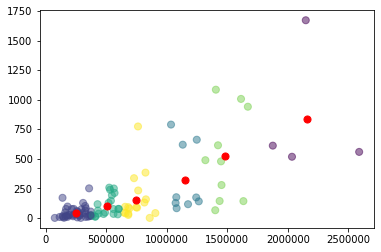

Death/Recovered


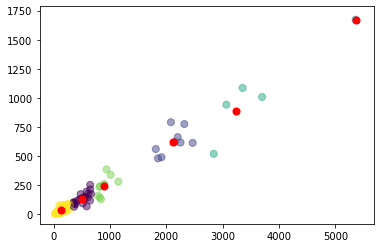

departements-france-2020-05-26.json
Death/Total


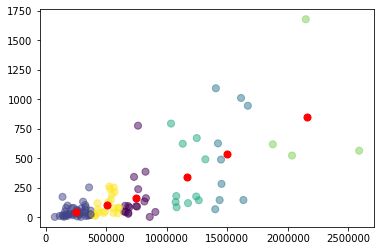

Death/Recovered


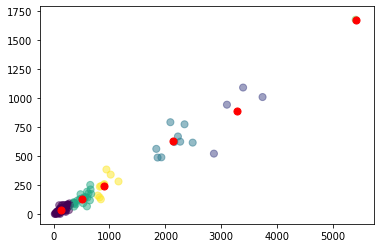

departements-france-2020-05-27.json
Death/Total


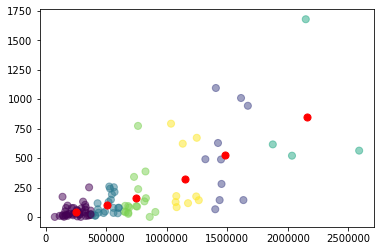

Death/Recovered


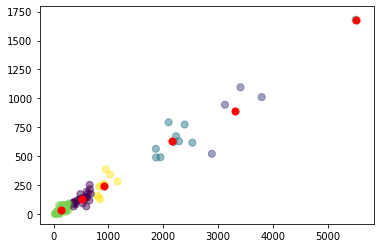

departements-france-2020-05-28.json
Death/Total


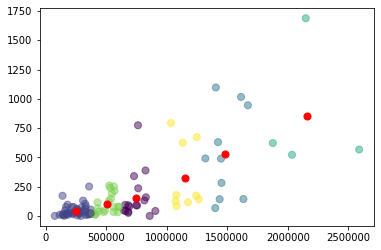

Death/Recovered


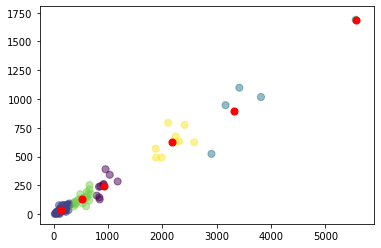

departements-france-2020-05-29.json
Death/Total


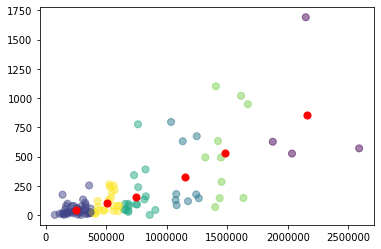

Death/Recovered


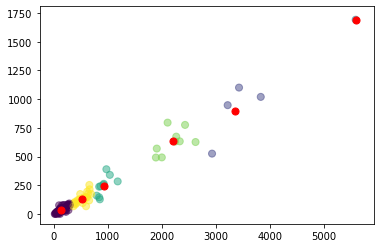

departements-france-2020-05-30.json
Death/Total


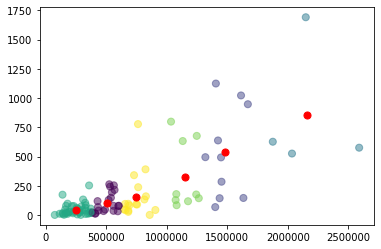

Death/Recovered


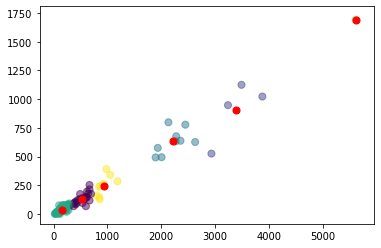

departements-france-2020-05-31.json
Death/Total


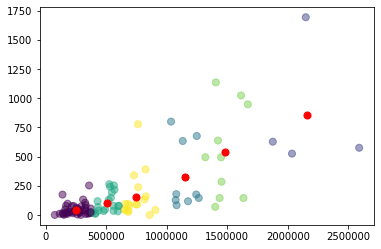

Death/Recovered


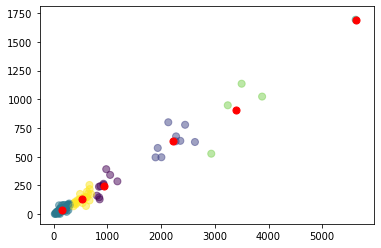

departements-france-2020-06-01.json
Death/Total


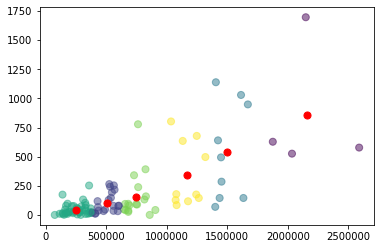

Death/Recovered


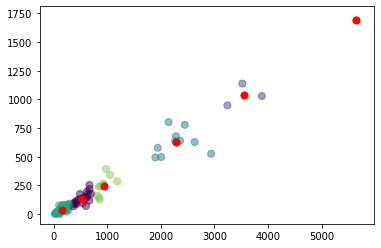

departements-france-2020-06-02.json
Death/Total


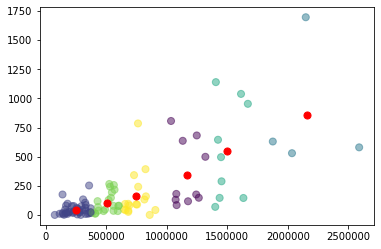

Death/Recovered


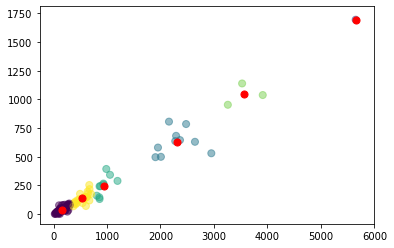

departements-france-2020-06-03.json
Death/Total


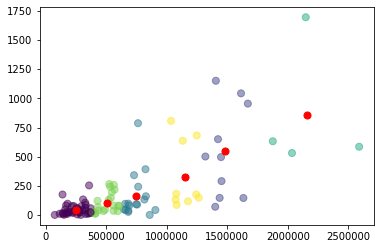

Death/Recovered


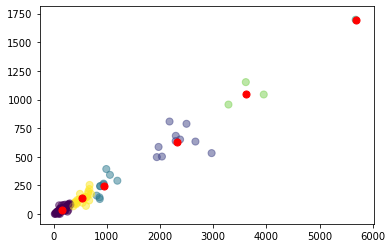

departements-france-2020-06-04.json
Death/Total


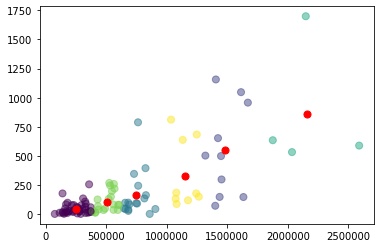

Death/Recovered


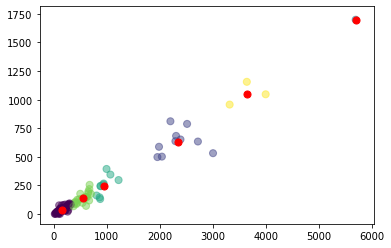

departements-france-2020-06-05.json
Death/Total


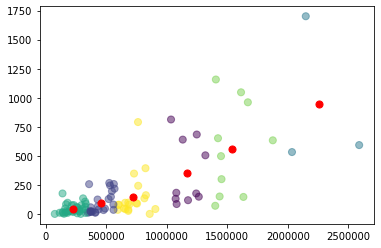

Death/Recovered


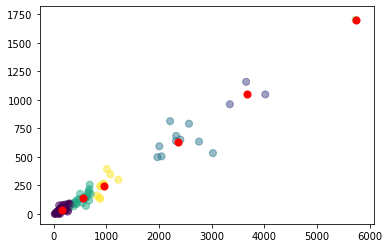

departements-france-2020-06-06.json
Death/Total


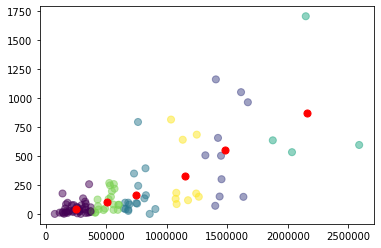

Death/Recovered


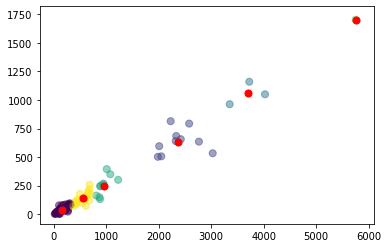

departements-france-2020-06-07.json
Death/Total


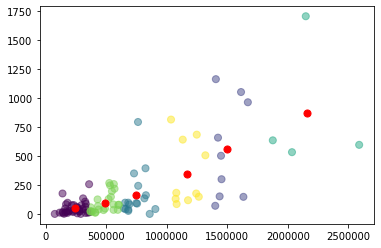

Death/Recovered


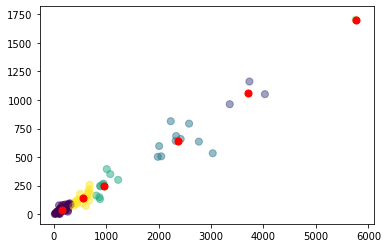

departements-france-2020-06-08.json
Death/Total


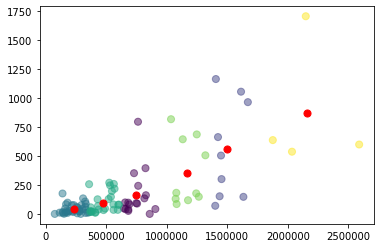

Death/Recovered


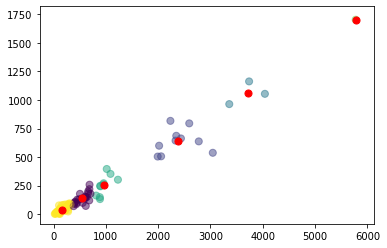

departements-france-2020-06-09.json
Death/Total


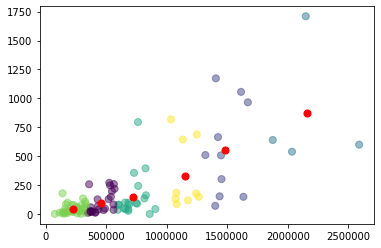

Death/Recovered


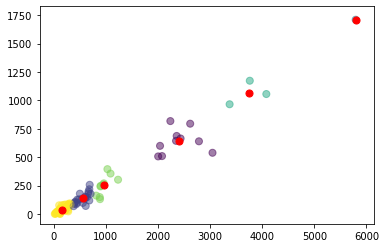

departements-france-2020-06-10.json
Death/Total


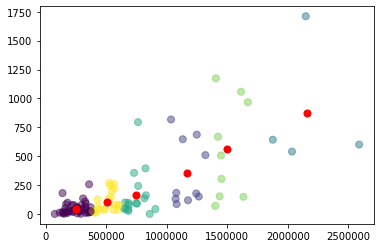

Death/Recovered


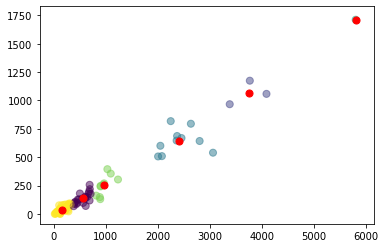

departements-france-2020-06-11.json
Death/Total


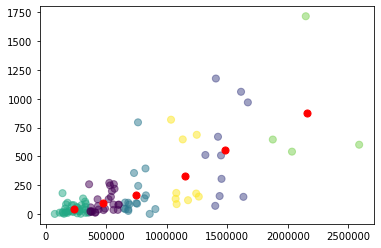

Death/Recovered


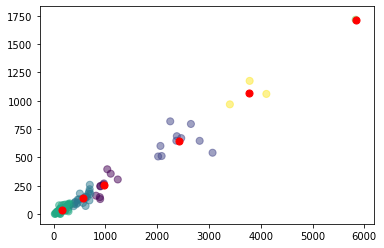

departements-france-2020-06-12.json
Death/Total


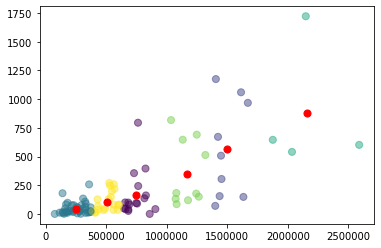

Death/Recovered


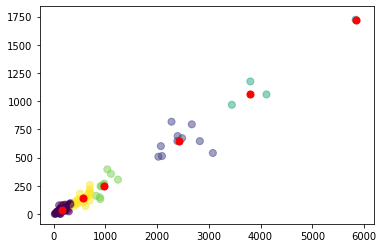

departements-france-2020-06-13.json
Death/Total


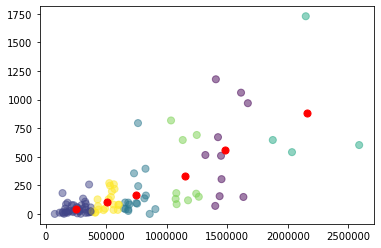

Death/Recovered


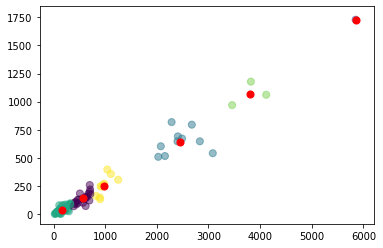

departements-france-2020-06-14.json
Death/Total


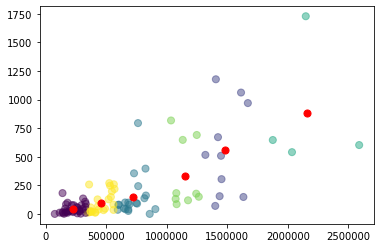

Death/Recovered


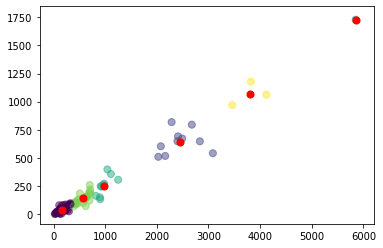

departements-france-2020-06-15.json
Death/Total


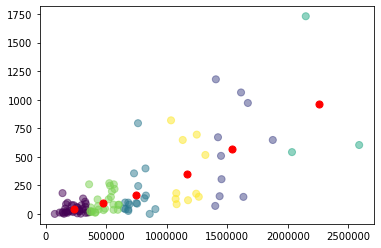

Death/Recovered


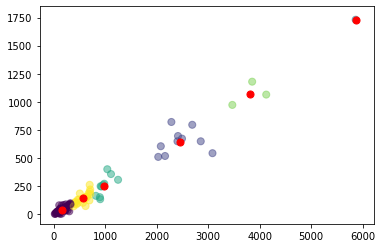

departements-france-2020-06-16.json
Death/Total


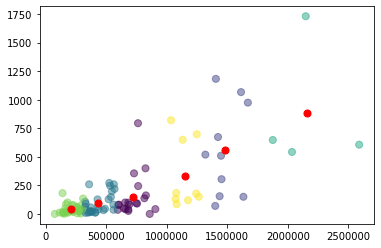

Death/Recovered


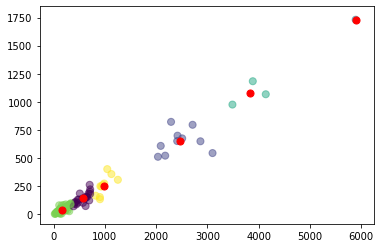

departements-france-2020-06-17.json
Death/Total


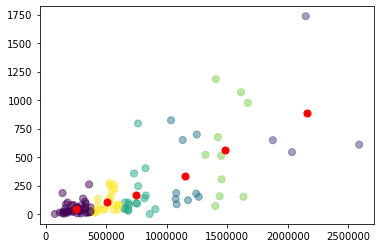

Death/Recovered


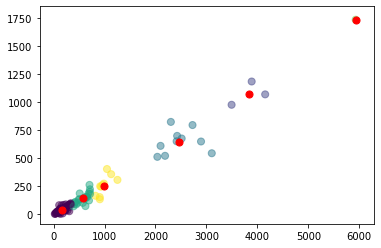

departements-france-2020-06-18.json
Death/Total


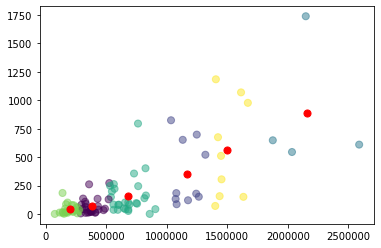

Death/Recovered


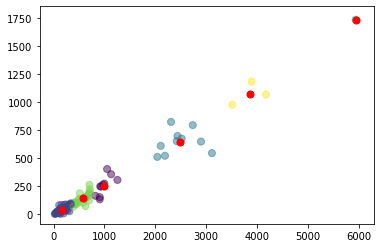

departements-france-2020-06-19.json
Death/Total


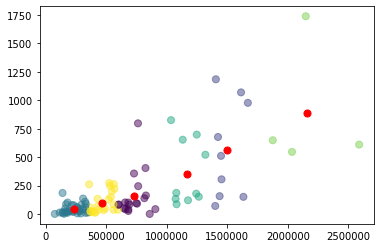

Death/Recovered


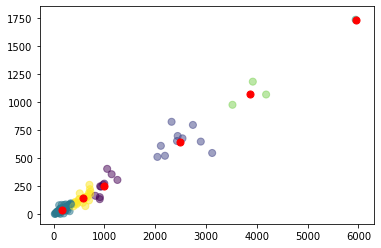

departements-france-2020-06-20.json
Death/Total


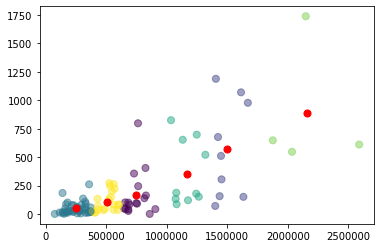

Death/Recovered


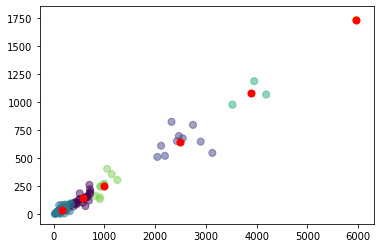

departements-france-2020-06-21.json
Death/Total


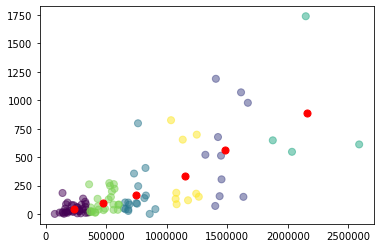

Death/Recovered


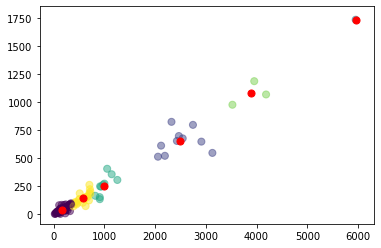

In [3]:
for files in json_files:
    with open("departements-france/"+files, 'r') as f:
            datastore = json.load(f)
            fileName = files
            CreateJsonFileNormalised(datastore, files)

In [4]:
tab = pd.json_normalize(datastore['features'])
tab = tab.drop(columns=['type',
                        'properties.Country/Region',
                        'properties.Population.Under19', 
                        'properties.Population.Under39', 
                        'properties.Population.Under59', 
                        'properties.Population.Under74', 
                        'properties.Population.Over75',
                        'geometry.type',
                        'geometry.coordinates',
                       ])
tab = tab.fillna(0)
tab

properties.Province/State properties.Code  properties.Population.Total  \
0                  Guadeloupe             971                       376879   
1                  Martinique             972                       358749   
2                      Guyane             973                       290691   
3                     Mayotte             976                       279471   
4                         Ain              01                       656955   
..                        ...             ...                          ...   
96             Hauts-de-Seine              92                      1613762   
97          Seine-Saint-Denis              93                      1670149   
98               Val-de-Marne              94                      1406041   
99                 Val-d'Oise              95                      1248354   
100               La RÃ©union             974                       859959   

     properties.Beds.Resuscitation  properties.Beds.IntensiveCare  \
0                               27                             68   
1                               26                             58   
2                               13                             12   
3                                6                              0   
4                               22                             20   
..                             ...                            ...   
96                             184                            276   
97                             100                            218   
98                             156                            338   
99                              60                            130   
100                             52                            154   

     properties.Beds.Total  properties.Deaths  properties.Recovered  \
0                       95                 19                    80   
1                       84                 14                    89   
2                       25                  6                   231   
3                        6                 26                   323   
4                       42                102                   413   
..                     ...                ...                   ...   
96                     460               1070                  4188   
97                     318                978                  3525   
98                     494               1189                  3955   
99                     190                698                  2469   
100                    206                  1                   132   

     properties.Severe  properties.Confirmed  ...  \
0                  6.0                 106.0  ...   
1                 12.0                  16.0  ...   
2                111.0                  43.0  ...   
3                 37.0                 128.0  ...   
4                 61.0                 118.0  ...   
..                 ...                   ...  ...   
96               807.0                  59.0  ...   
97               759.0                  45.0  ...   
98               664.0                  48.0  ...   
99               387.0                  60.0  ...   
100               24.0                   0.0  ...   

     properties.MedicalTests.Total/Accumulated  \
0                                         51.0   
1                                         29.0   
2                                         35.0   
3                                          4.0   
4                                       3606.0   
..                                         ...   
96                                     11950.0   
97                                      8715.0   
98                                      8850.0   
99                                      7014.0   
100                                       19.0   

     properties.MedicalTests.Confirmed/Accumulated  properties.Critical  \
0                                             17.0                  0.0 

regions-france-2020-03-01.json
Death/Total


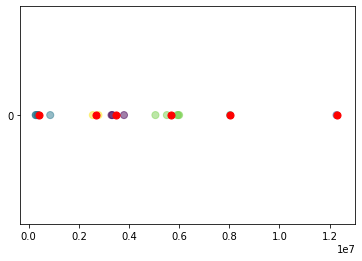

Death/Recovered


D:\Users\Whiteyeas\anaconda3\lib\site-packages\ipykernel_launcher.py:80: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (6). Possibly due to duplicate points in X.


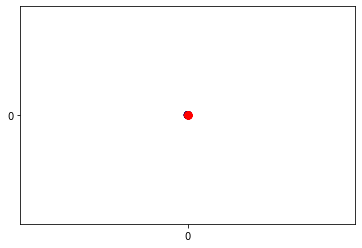

regions-france-2020-03-02.json
Death/Total


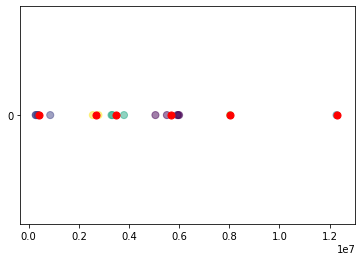

D:\Users\Whiteyeas\anaconda3\lib\site-packages\ipykernel_launcher.py:80: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.


Death/Recovered


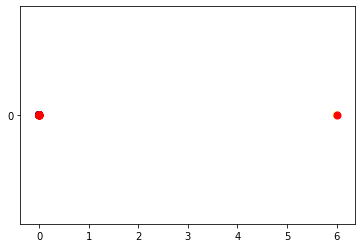

regions-france-2020-03-03.json
Death/Total


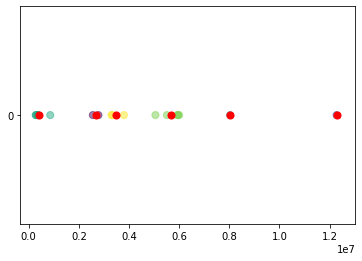

Death/Recovered


D:\Users\Whiteyeas\anaconda3\lib\site-packages\ipykernel_launcher.py:80: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.


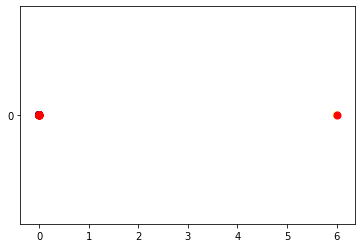

regions-france-2020-03-04.json
Death/Total


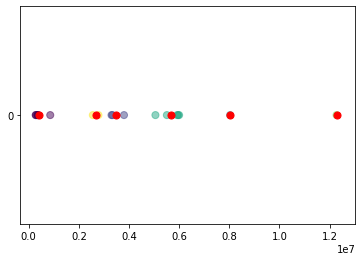

Death/Recovered


D:\Users\Whiteyeas\anaconda3\lib\site-packages\ipykernel_launcher.py:80: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.


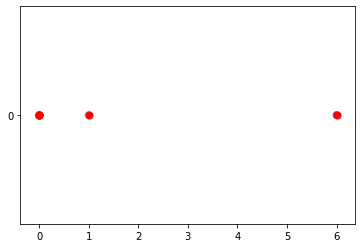

regions-france-2020-03-05.json
Death/Total


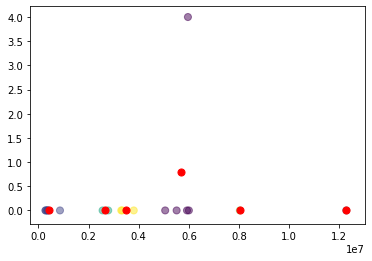

Death/Recovered


D:\Users\Whiteyeas\anaconda3\lib\site-packages\ipykernel_launcher.py:80: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.


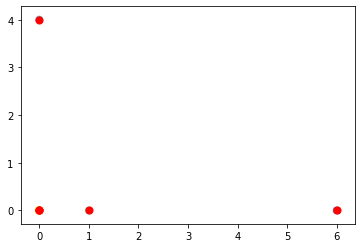

regions-france-2020-03-06.json
Death/Total


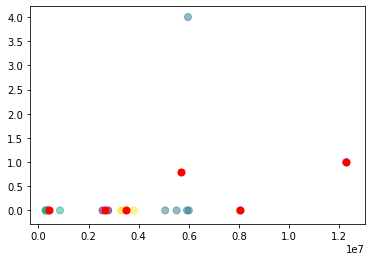

Death/Recovered


D:\Users\Whiteyeas\anaconda3\lib\site-packages\ipykernel_launcher.py:80: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.


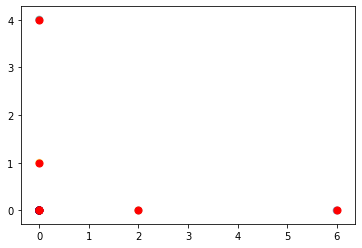

regions-france-2020-03-07.json
Death/Total


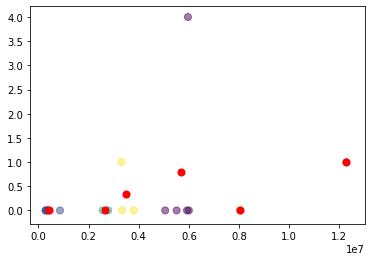

Death/Recovered


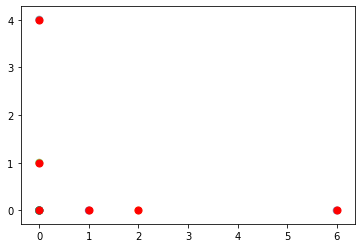

regions-france-2020-03-08.json
Death/Total


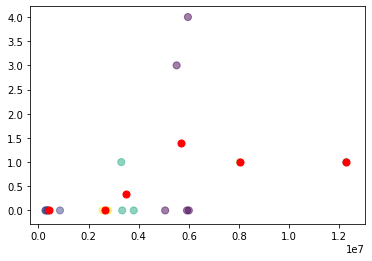

Death/Recovered


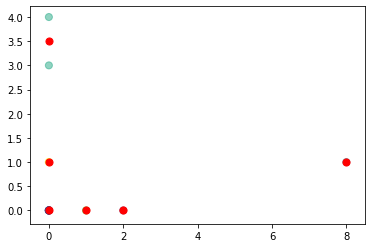

regions-france-2020-03-09.json
Death/Total


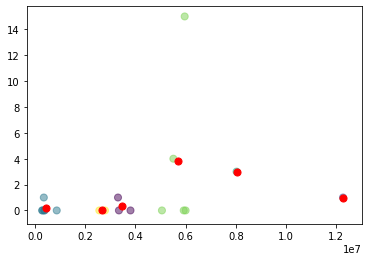

Death/Recovered


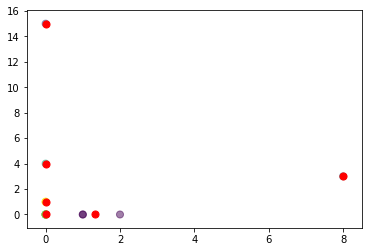

regions-france-2020-03-10.json
Death/Total


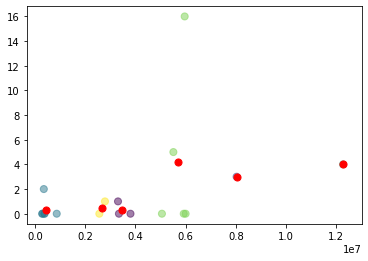

Death/Recovered


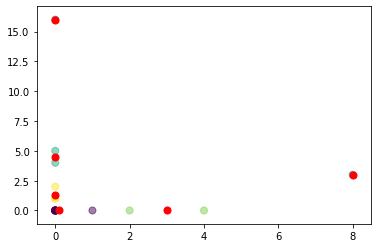

regions-france-2020-03-11.json
Death/Total


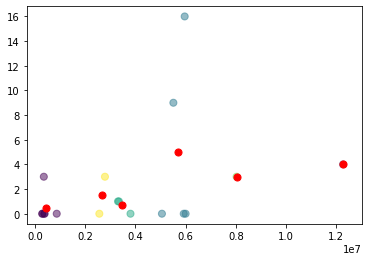

Death/Recovered


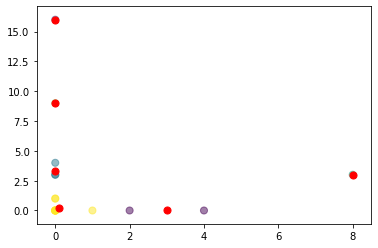

regions-france-2020-03-12.json
Death/Total


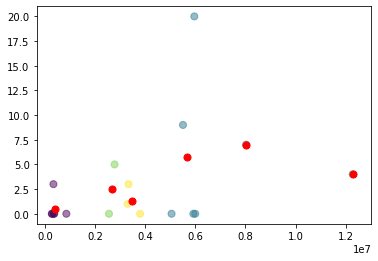

Death/Recovered


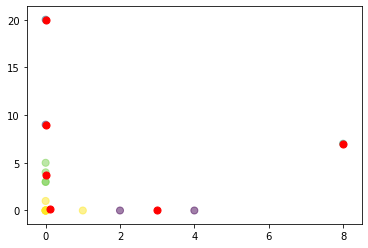

regions-france-2020-03-13.json
Death/Total


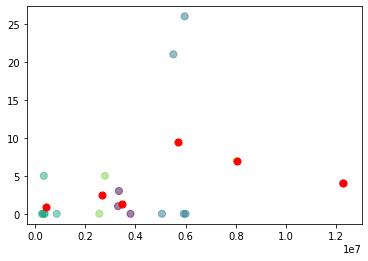

Death/Recovered


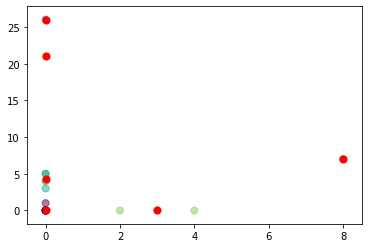

regions-france-2020-03-14.json
Death/Total


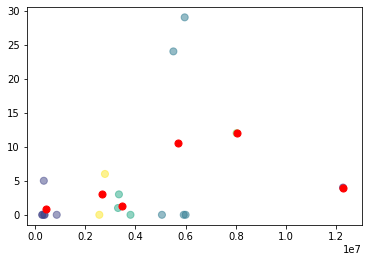

Death/Recovered


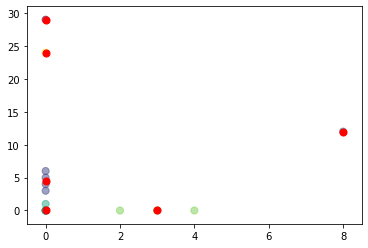

regions-france-2020-03-15.json
Death/Total


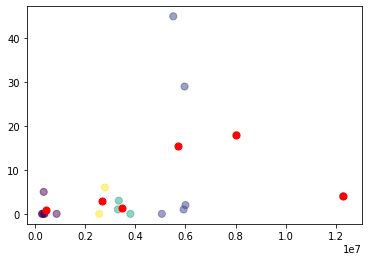

Death/Recovered


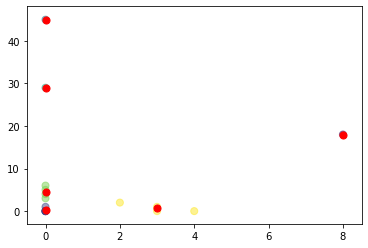

regions-france-2020-03-16.json
Death/Total


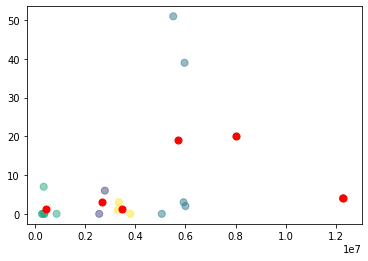

Death/Recovered


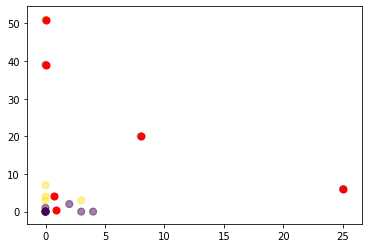

regions-france-2020-03-17.json
Death/Total


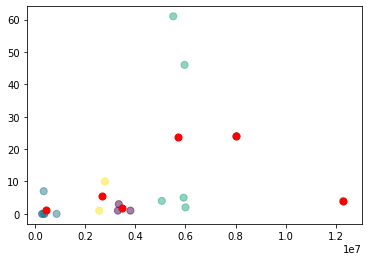

Death/Recovered


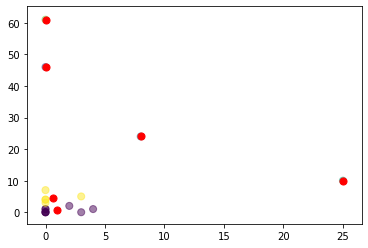

regions-france-2020-03-18.json
Death/Total


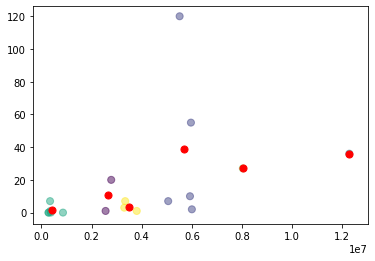

Death/Recovered


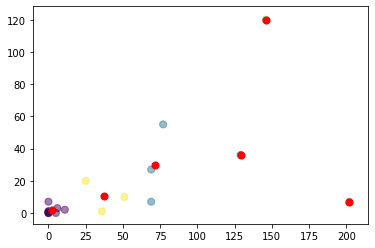

regions-france-2020-03-19.json
Death/Total


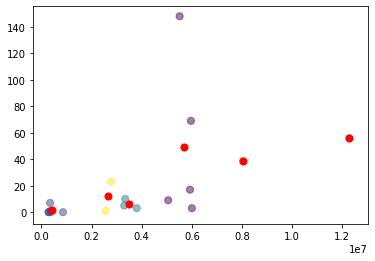

Death/Recovered


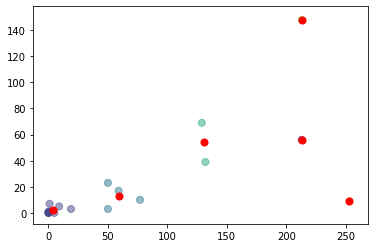

regions-france-2020-03-20.json
Death/Total


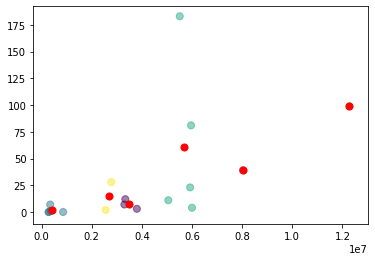

Death/Recovered


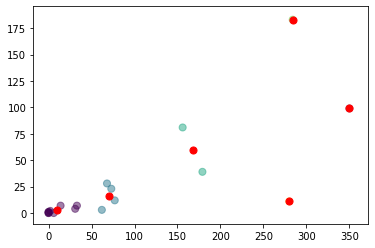

regions-france-2020-03-21.json
Death/Total


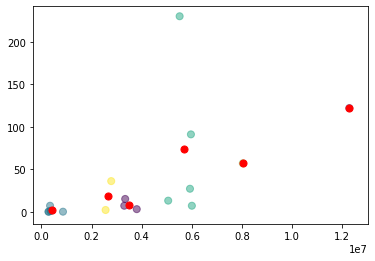

Death/Recovered


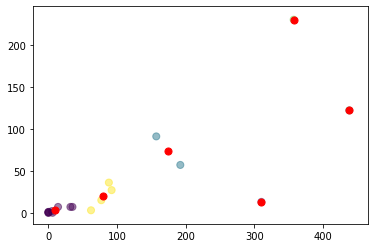

regions-france-2020-03-22.json
Death/Total


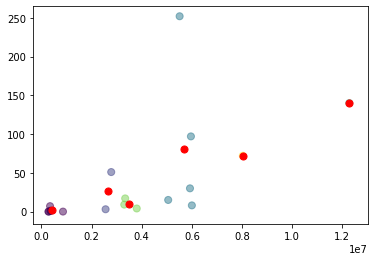

Death/Recovered


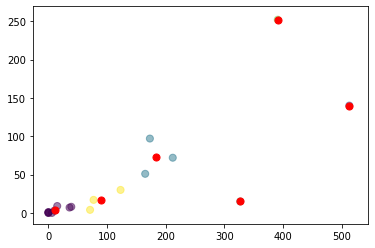

regions-france-2020-03-23.json
Death/Total


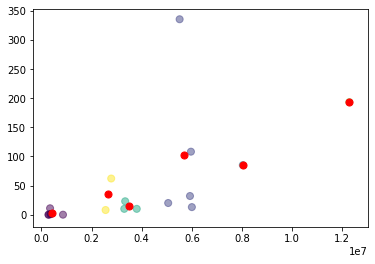

Death/Recovered


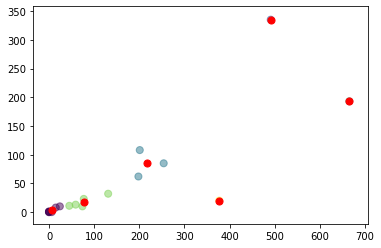

regions-france-2020-03-24.json
Death/Total


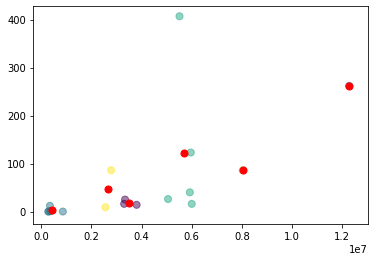

Death/Recovered


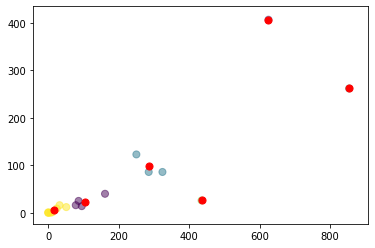

regions-france-2020-03-25.json
Death/Total


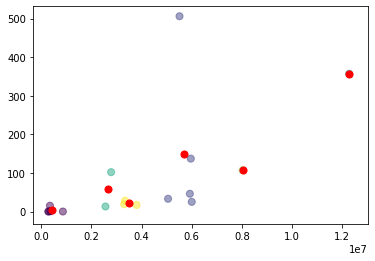

Death/Recovered


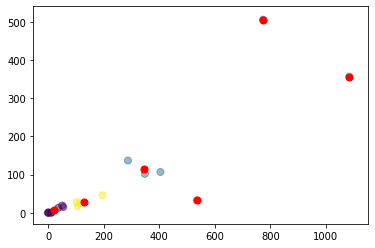

regions-france-2020-03-26.json
Death/Total


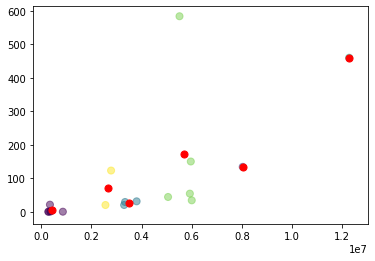

Death/Recovered


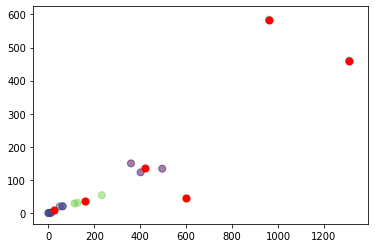

regions-france-2020-03-27.json
Death/Total


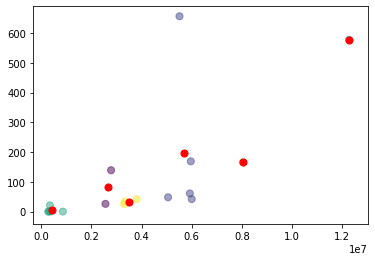

Death/Recovered


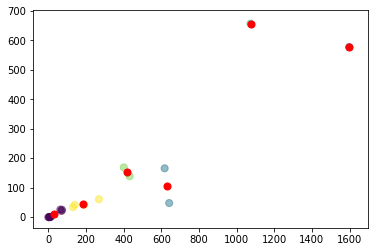

regions-france-2020-03-28.json
Death/Total


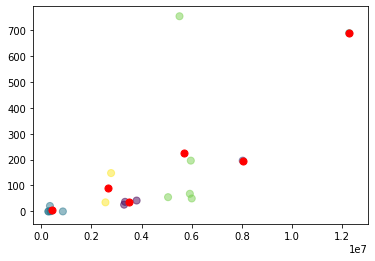

Death/Recovered


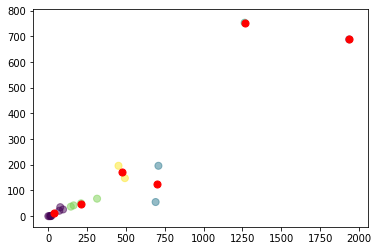

regions-france-2020-03-29.json
Death/Total


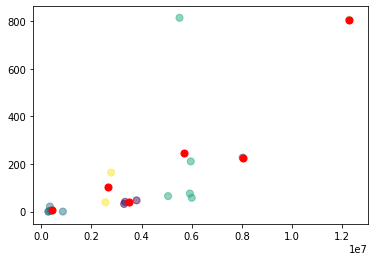

Death/Recovered


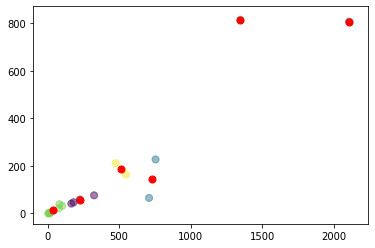

regions-france-2020-03-30.json
Death/Total


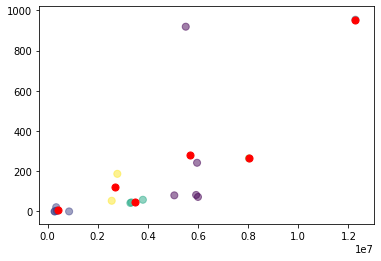

Death/Recovered


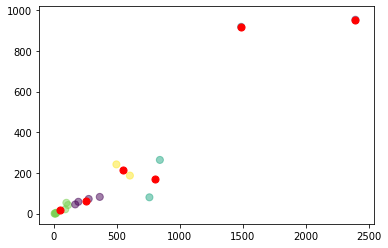

regions-france-2020-03-31.json
Death/Total


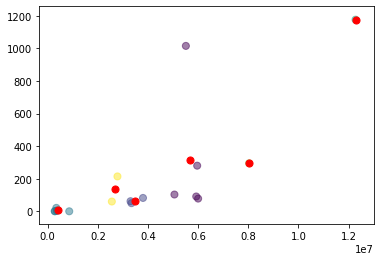

Death/Recovered


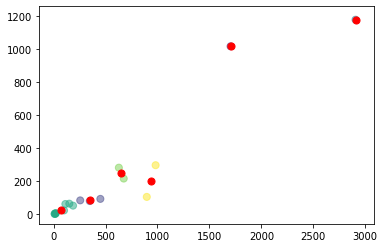

regions-france-2020-04-01.json
Death/Total


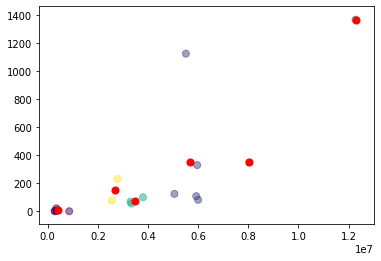

Death/Recovered


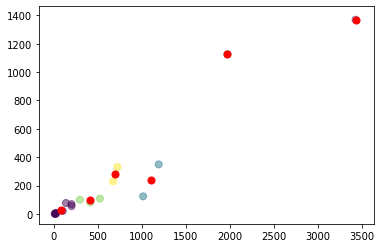

regions-france-2020-04-02.json
Death/Total


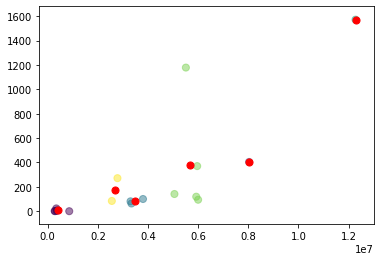

Death/Recovered


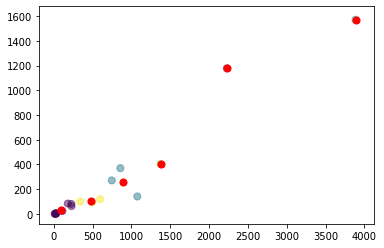

regions-france-2020-04-03.json
Death/Total


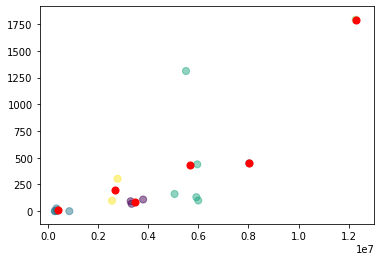

Death/Recovered


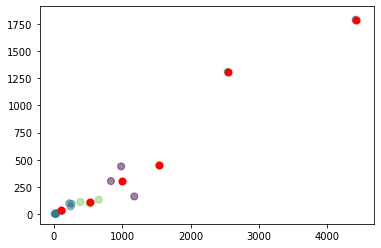

regions-france-2020-04-04.json
Death/Total


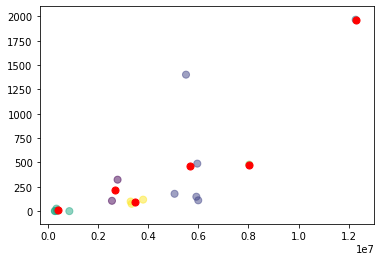

Death/Recovered


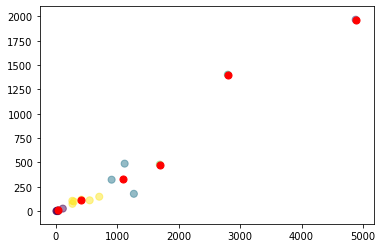

regions-france-2020-04-05.json
Death/Total


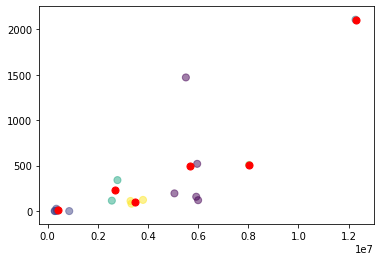

Death/Recovered


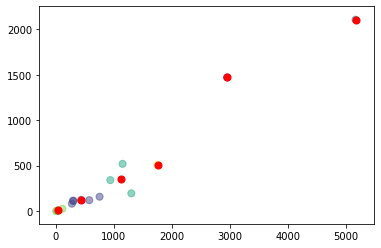

regions-france-2020-04-06.json
Death/Total


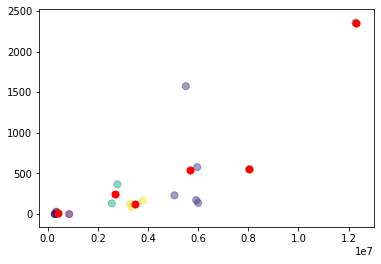

Death/Recovered


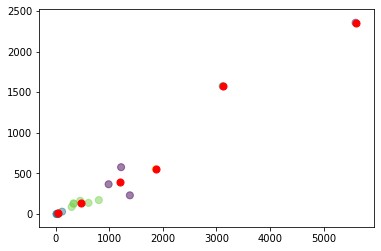

regions-france-2020-04-07.json
Death/Total


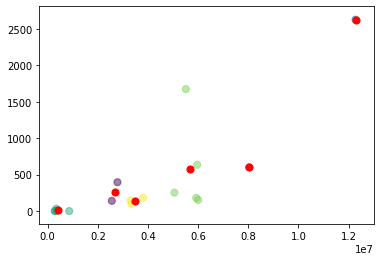

Death/Recovered


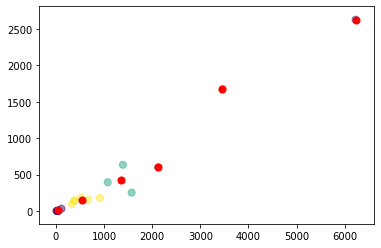

regions-france-2020-04-08.json
Death/Total


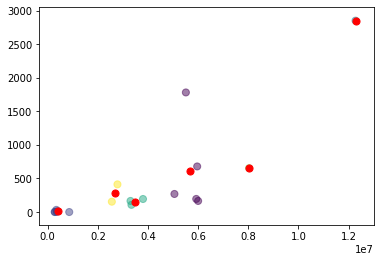

Death/Recovered


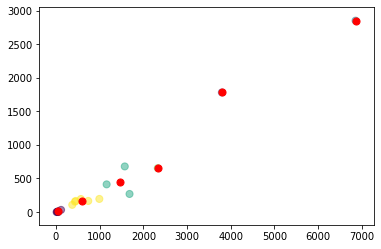

regions-france-2020-04-09.json
Death/Total


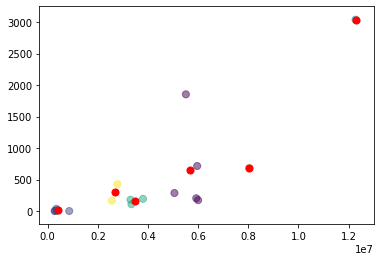

Death/Recovered


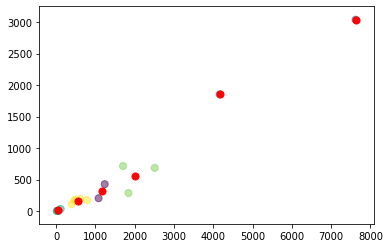

regions-france-2020-04-10.json
Death/Total


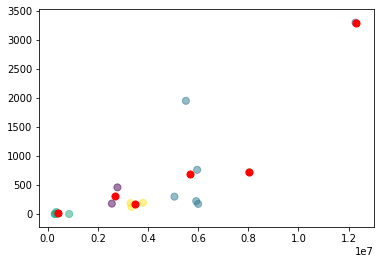

Death/Recovered


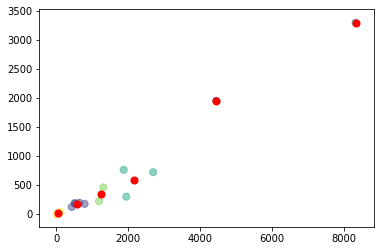

regions-france-2020-04-11.json
Death/Total


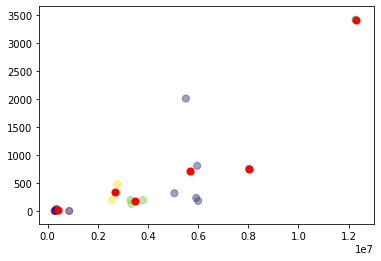

Death/Recovered


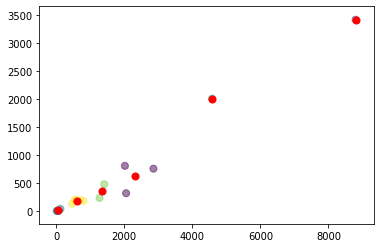

regions-france-2020-04-12.json
Death/Total


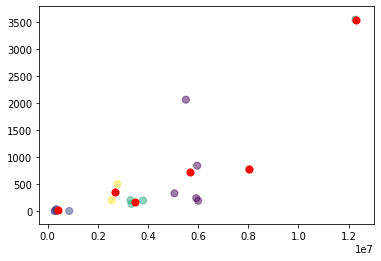

Death/Recovered


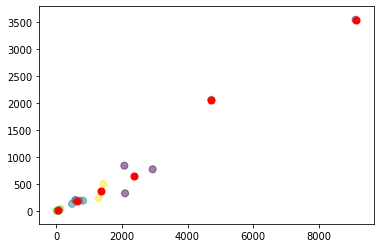

regions-france-2020-04-13.json
Death/Total


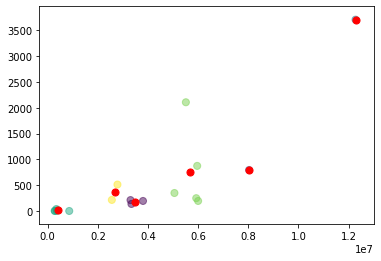

Death/Recovered


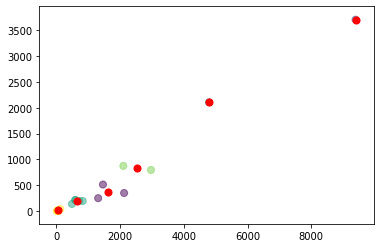

regions-france-2020-04-14.json
Death/Total


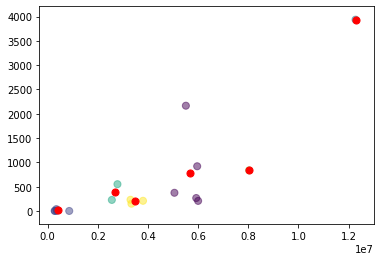

Death/Recovered


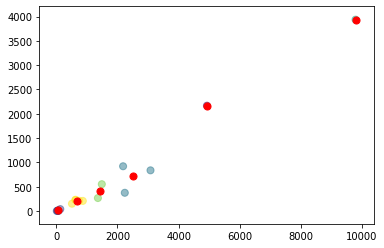

regions-france-2020-04-15.json
Death/Total


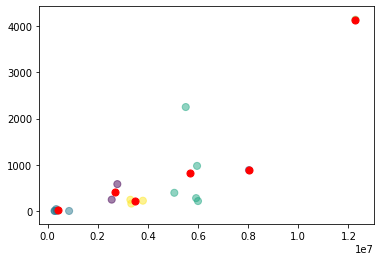

Death/Recovered


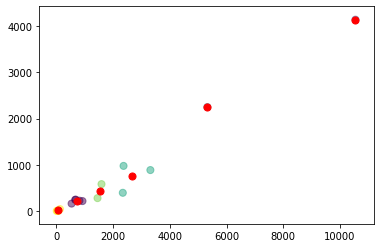

regions-france-2020-04-16.json
Death/Total


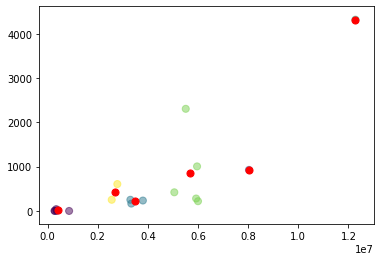

Death/Recovered


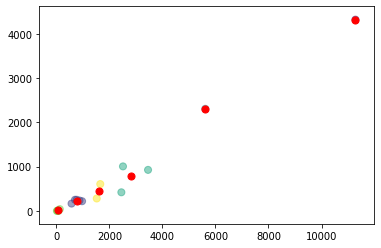

regions-france-2020-04-17.json
Death/Total


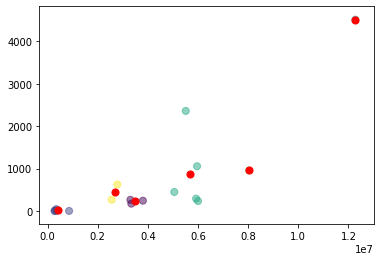

Death/Recovered


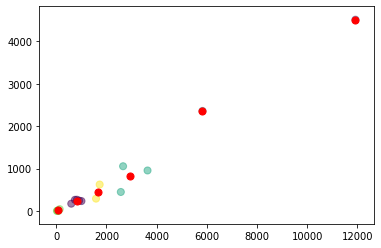

regions-france-2020-04-18.json
Death/Total


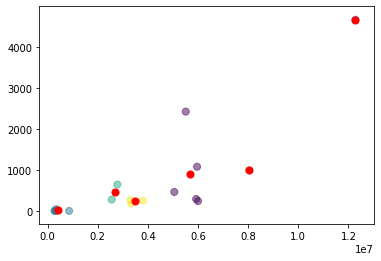

Death/Recovered


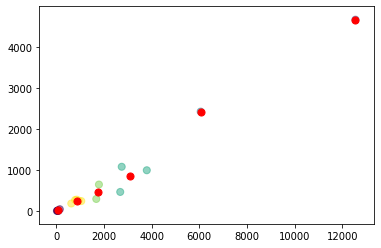

regions-france-2020-04-19.json
Death/Total


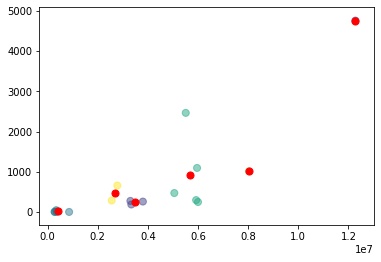

Death/Recovered


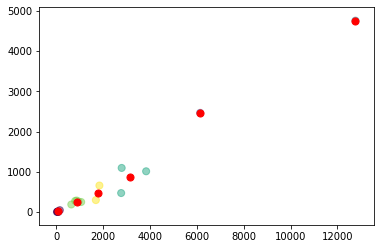

regions-france-2020-04-20.json
Death/Total


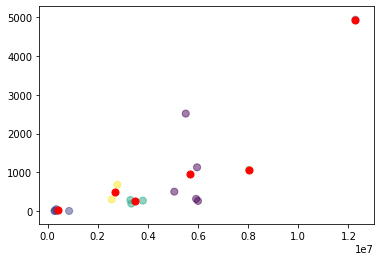

Death/Recovered


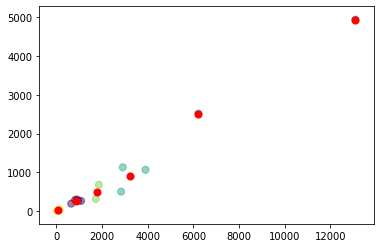

regions-france-2020-04-21.json
Death/Total


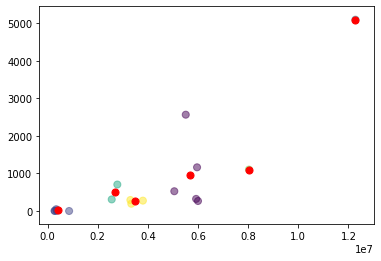

Death/Recovered


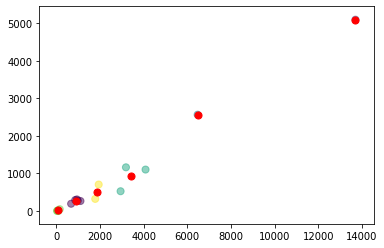

regions-france-2020-04-22.json
Death/Total


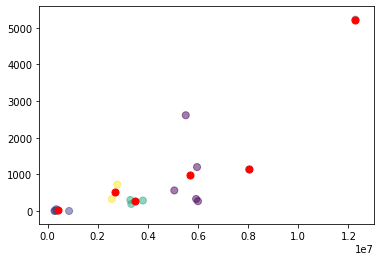

Death/Recovered


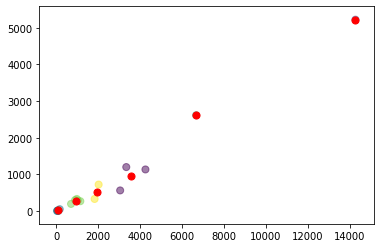

regions-france-2020-04-23.json
Death/Total


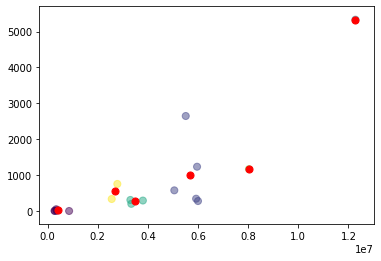

Death/Recovered


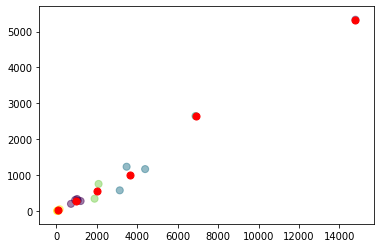

regions-france-2020-04-24.json
Death/Total


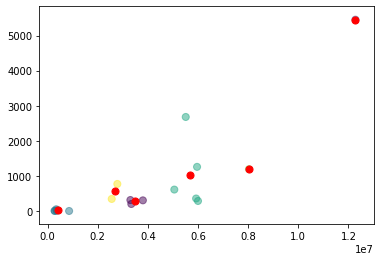

Death/Recovered


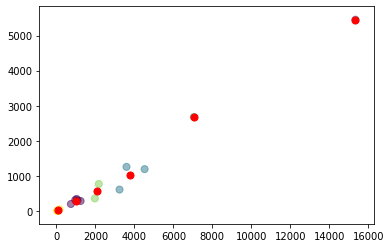

regions-france-2020-04-25.json
Death/Total


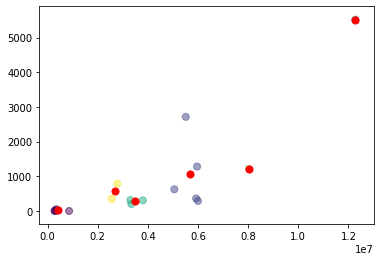

Death/Recovered


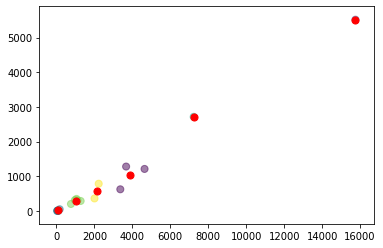

regions-france-2020-04-26.json
Death/Total


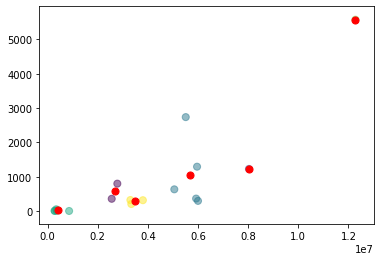

Death/Recovered


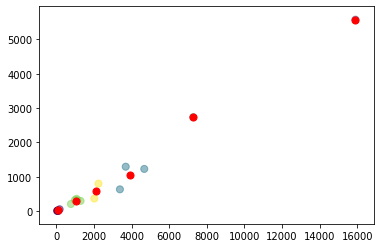

regions-france-2020-04-27.json
Death/Total


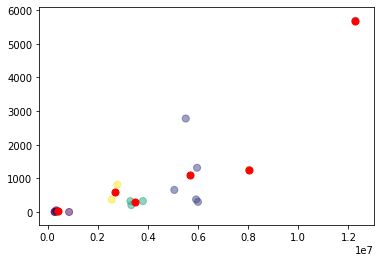

Death/Recovered


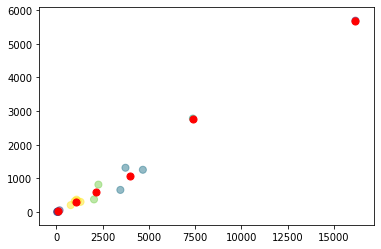

regions-france-2020-04-28.json
Death/Total


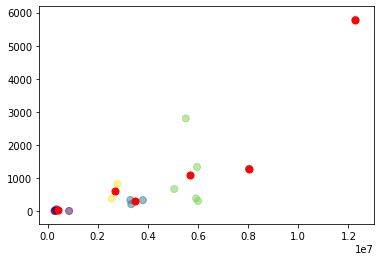

Death/Recovered


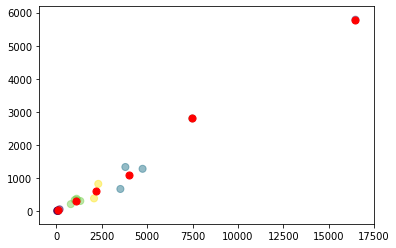

regions-france-2020-04-29.json
Death/Total


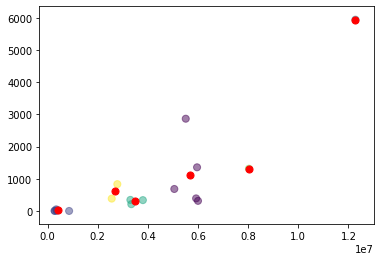

Death/Recovered


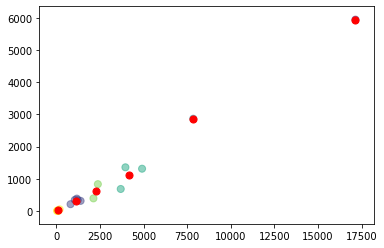

regions-france-2020-04-30.json
Death/Total


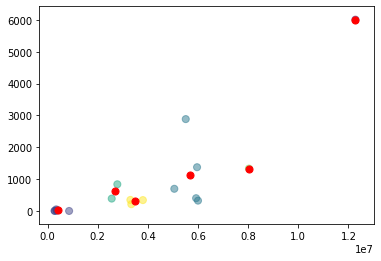

Death/Recovered


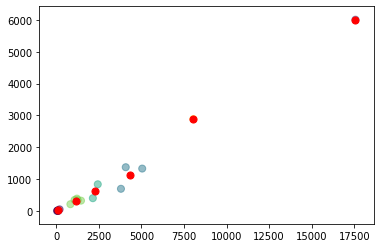

regions-france-2020-05-01.json
Death/Total


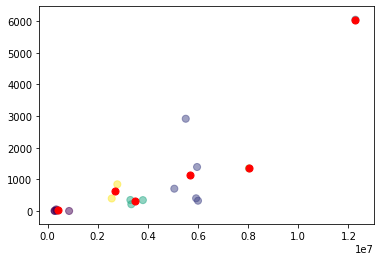

Death/Recovered


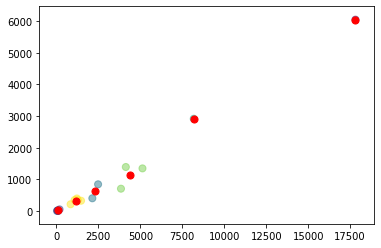

regions-france-2020-05-02.json
Death/Total


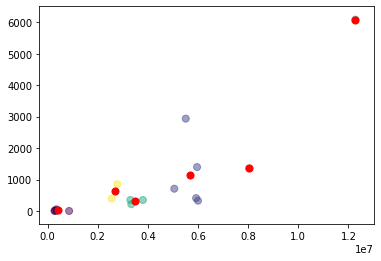

Death/Recovered


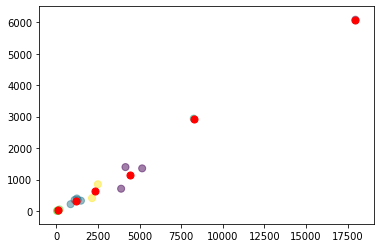

regions-france-2020-05-03.json
Death/Total


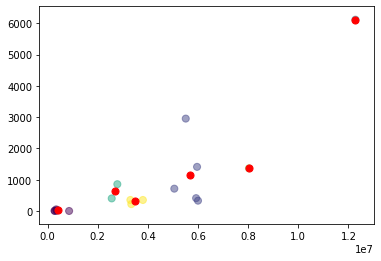

Death/Recovered


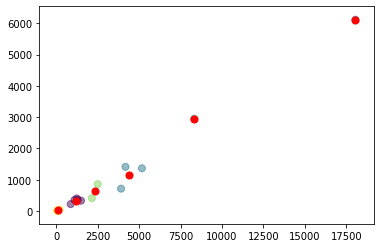

regions-france-2020-05-04.json
Death/Total


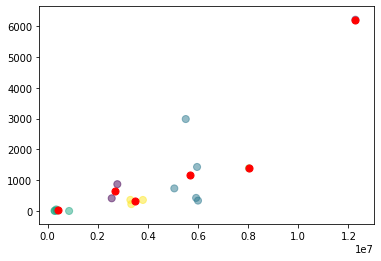

Death/Recovered


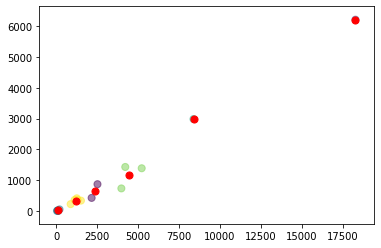

regions-france-2020-05-05.json
Death/Total


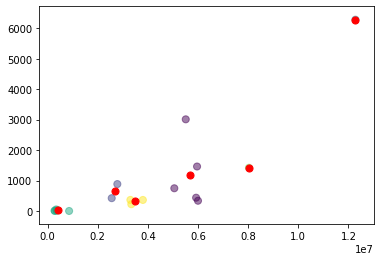

Death/Recovered


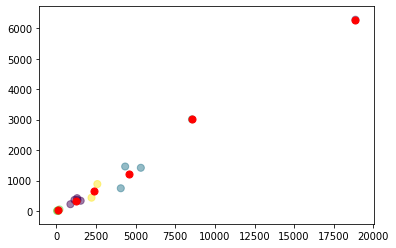

regions-france-2020-05-06.json
Death/Total


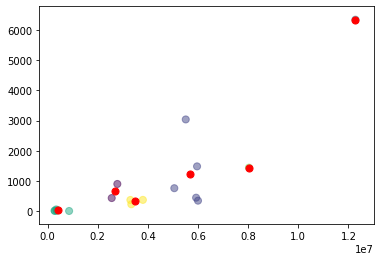

Death/Recovered


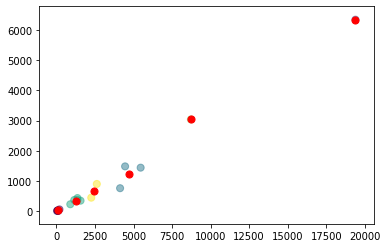

regions-france-2020-05-07.json
Death/Total


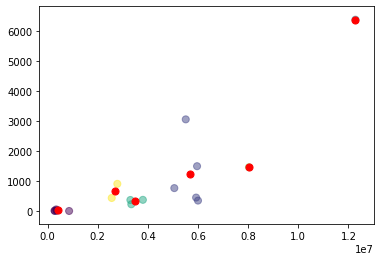

Death/Recovered


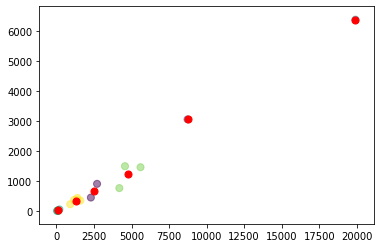

regions-france-2020-05-08.json
Death/Total


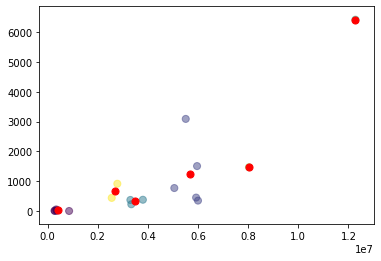

Death/Recovered


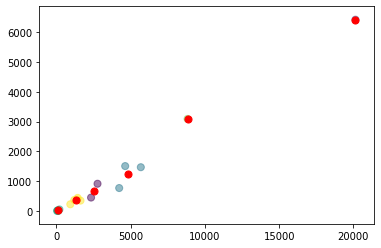

regions-france-2020-05-09.json
Death/Total


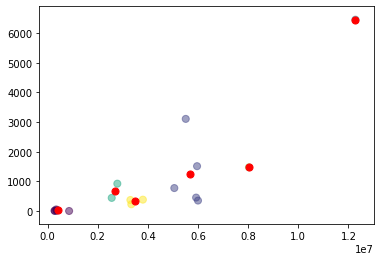

Death/Recovered


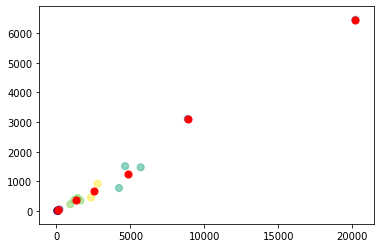

regions-france-2020-05-10.json
Death/Total


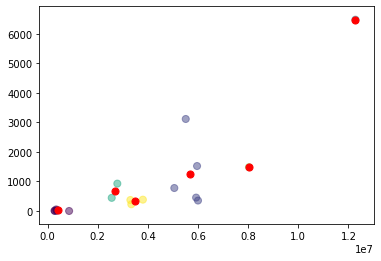

Death/Recovered


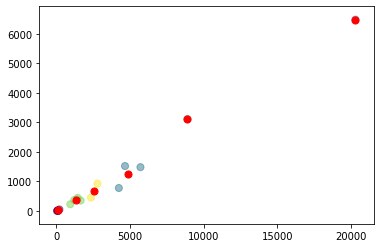

regions-france-2020-05-11.json
Death/Total


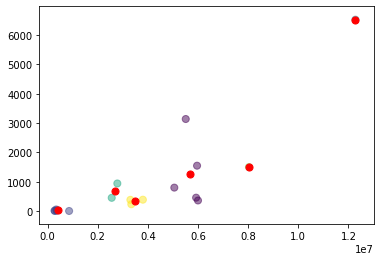

Death/Recovered


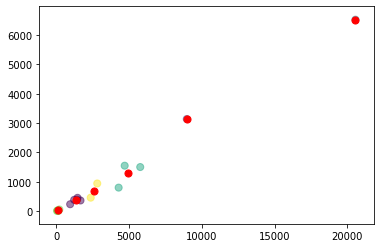

regions-france-2020-05-12.json
Death/Total


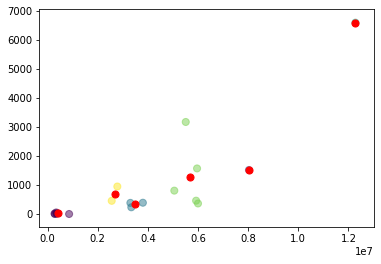

Death/Recovered


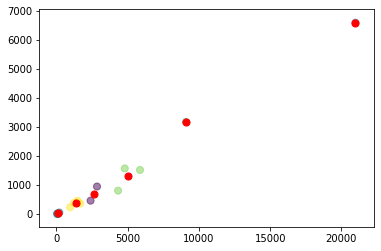

regions-france-2020-05-13.json
Death/Total


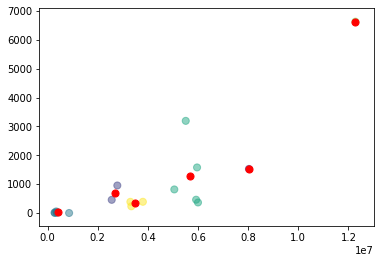

Death/Recovered


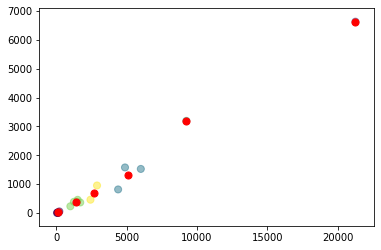

regions-france-2020-05-14.json
Death/Total


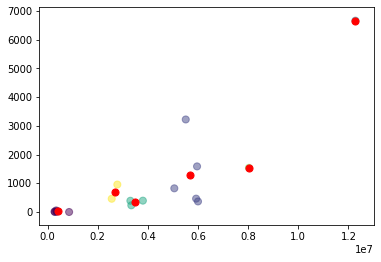

Death/Recovered


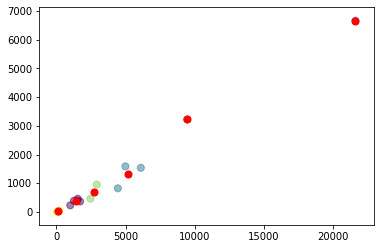

regions-france-2020-05-15.json
Death/Total


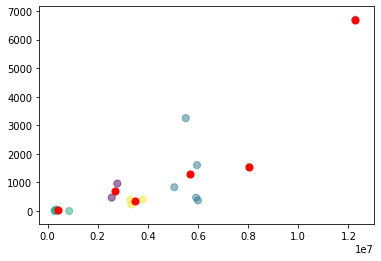

Death/Recovered


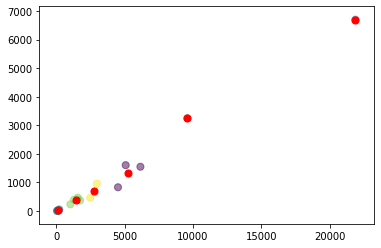

regions-france-2020-05-16.json
Death/Total


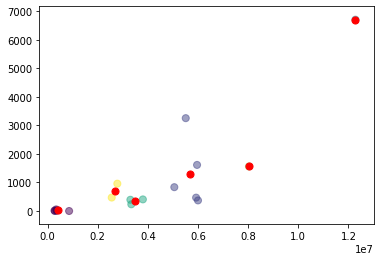

Death/Recovered


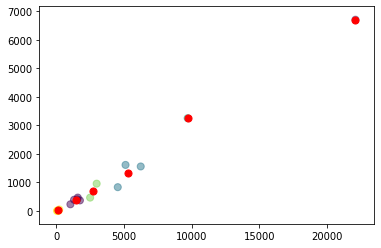

regions-france-2020-05-17.json
Death/Total


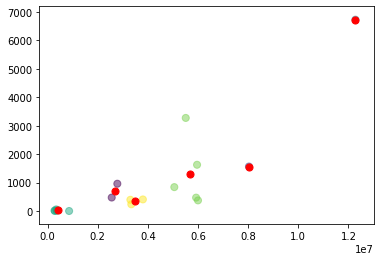

Death/Recovered


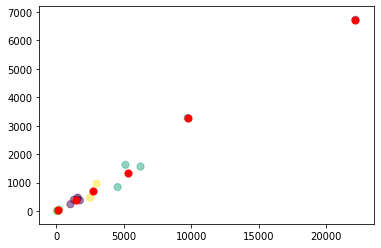

regions-france-2020-05-18.json
Death/Total


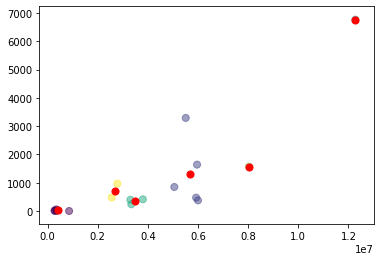

Death/Recovered


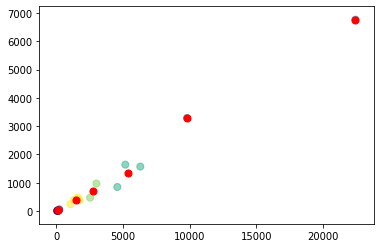

regions-france-2020-05-19.json
Death/Total


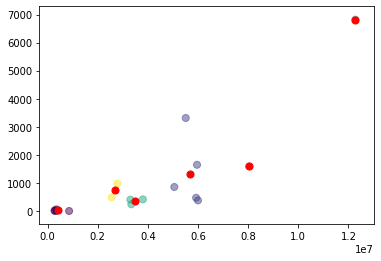

Death/Recovered


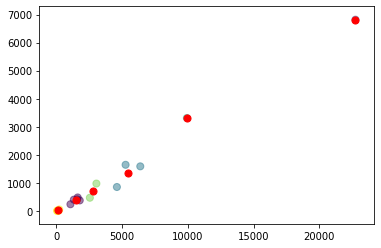

regions-france-2020-05-20.json
Death/Total


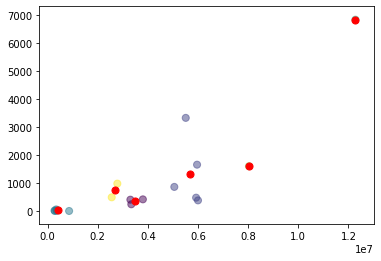

Death/Recovered


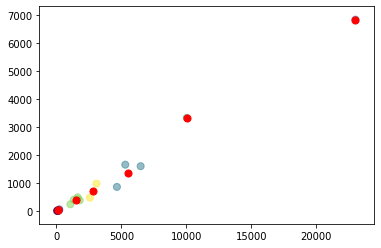

regions-france-2020-05-21.json
Death/Total


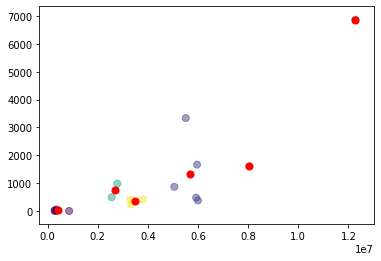

Death/Recovered


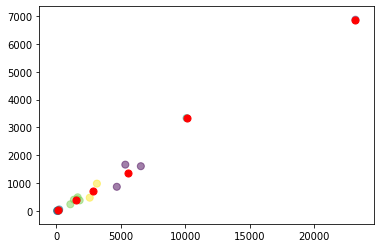

regions-france-2020-05-22.json
Death/Total


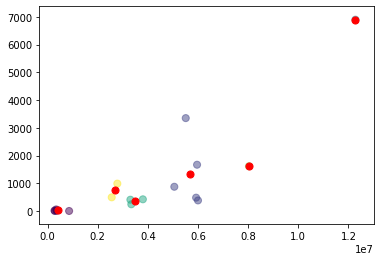

Death/Recovered


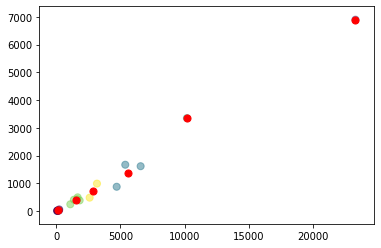

regions-france-2020-05-23.json
Death/Total


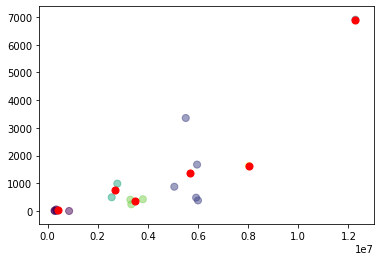

Death/Recovered


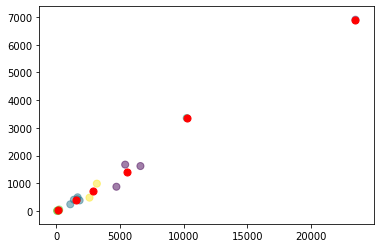

regions-france-2020-05-24.json
Death/Total


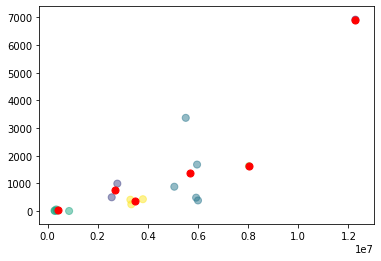

Death/Recovered


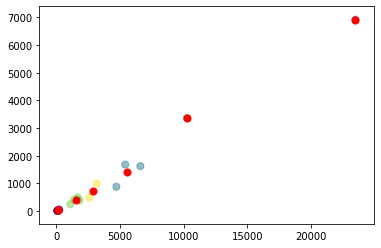

regions-france-2020-05-25.json
Death/Total


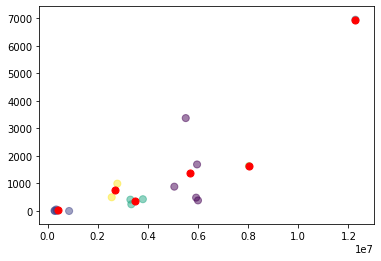

Death/Recovered


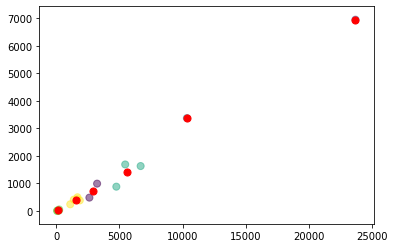

regions-france-2020-05-26.json
Death/Total


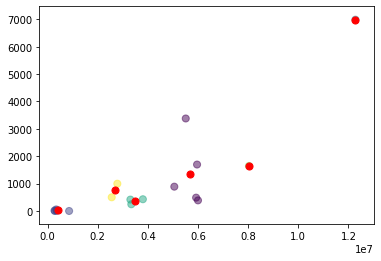

Death/Recovered


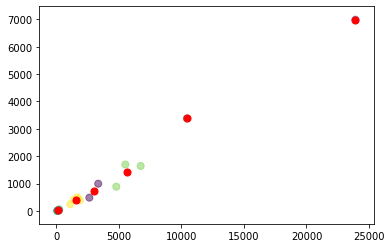

regions-france-2020-05-27.json
Death/Total


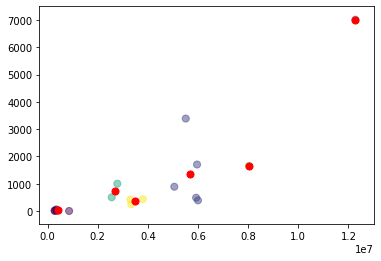

Death/Recovered


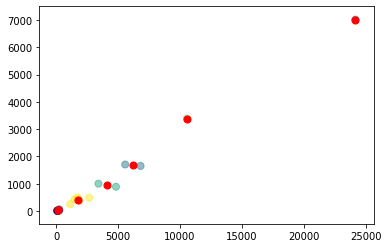

regions-france-2020-05-28.json
Death/Total


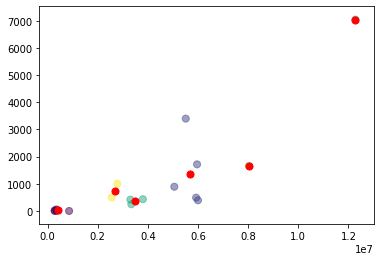

Death/Recovered


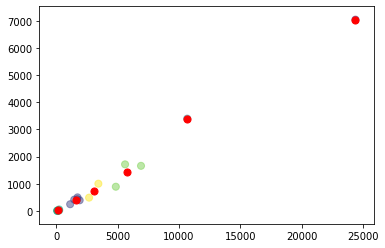

regions-france-2020-05-29.json
Death/Total


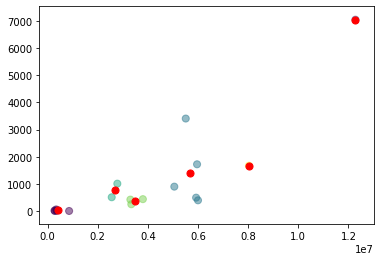

Death/Recovered


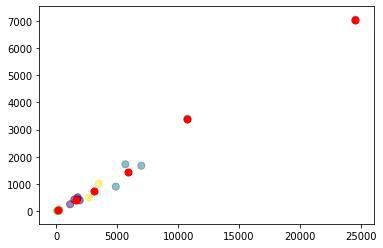

regions-france-2020-05-30.json
Death/Total


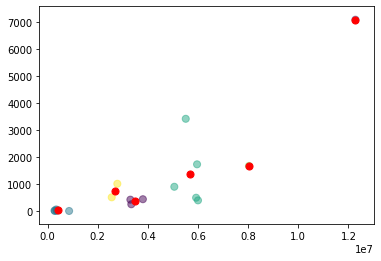

Death/Recovered


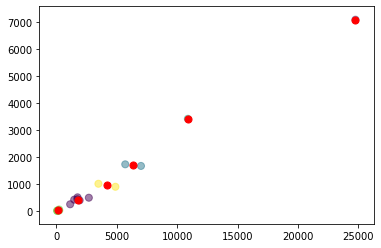

regions-france-2020-05-31.json
Death/Total


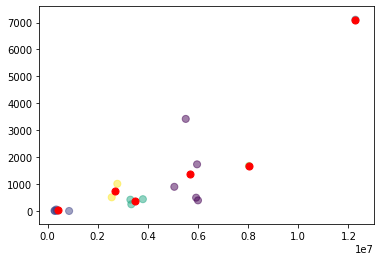

Death/Recovered


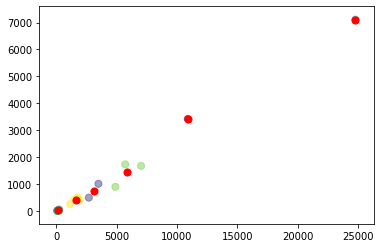

regions-france-2020-06-01.json
Death/Total


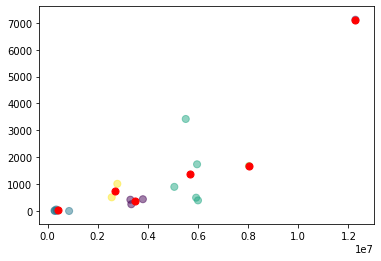

Death/Recovered


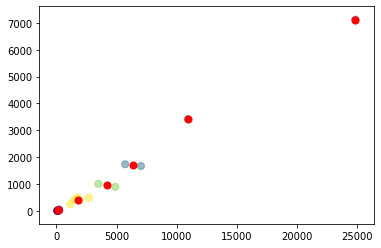

regions-france-2020-06-02.json
Death/Total


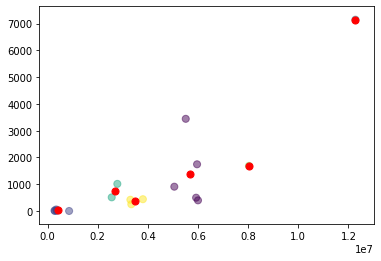

Death/Recovered


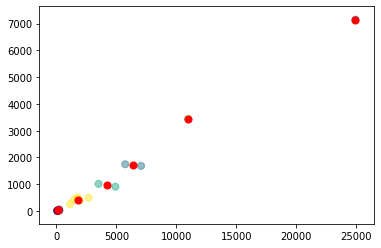

regions-france-2020-06-03.json
Death/Total


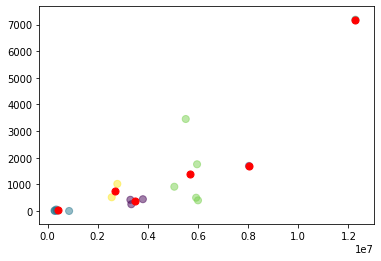

Death/Recovered


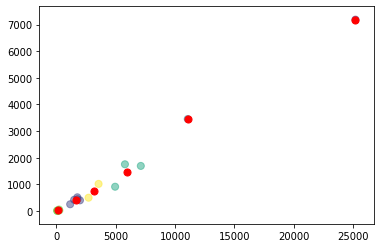

regions-france-2020-06-04.json
Death/Total


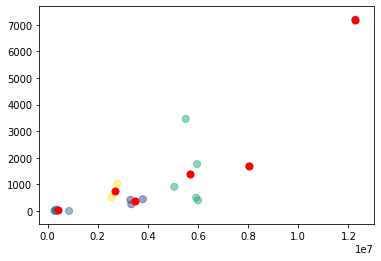

Death/Recovered


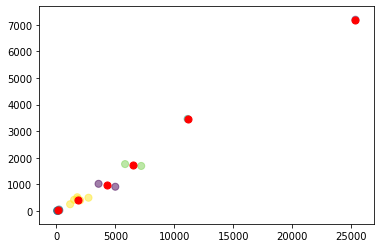

regions-france-2020-06-05.json
Death/Total


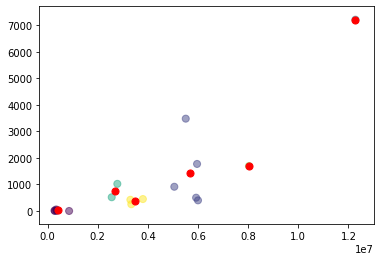

Death/Recovered


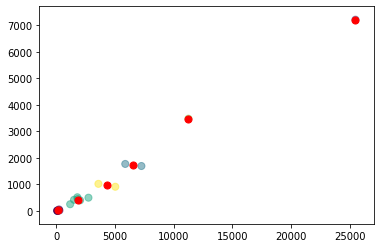

regions-france-2020-06-06.json
Death/Total


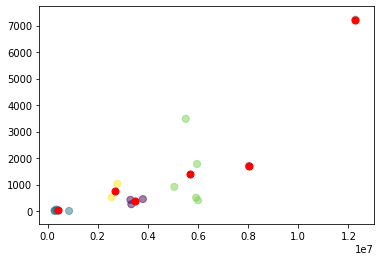

Death/Recovered


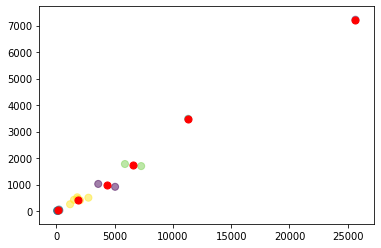

regions-france-2020-06-07.json
Death/Total


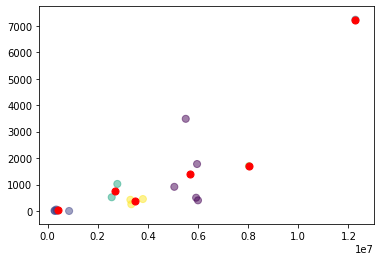

Death/Recovered


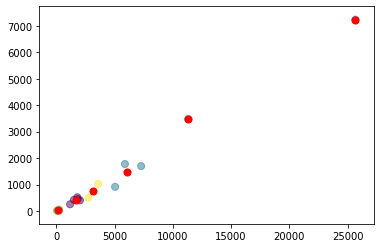

regions-france-2020-06-08.json
Death/Total


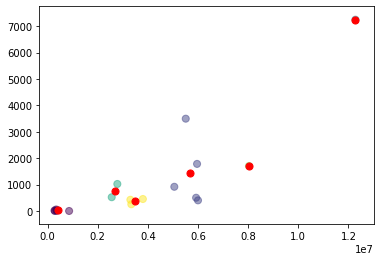

Death/Recovered


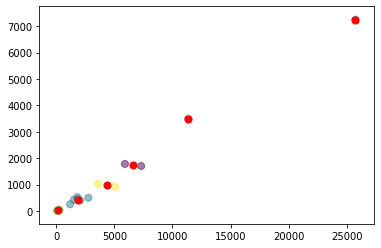

regions-france-2020-06-09.json
Death/Total


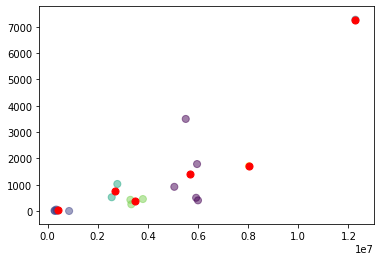

Death/Recovered


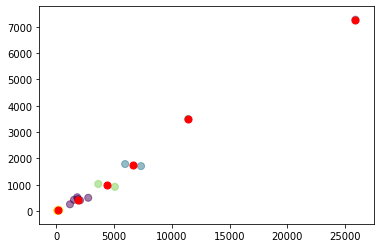

regions-france-2020-06-10.json
Death/Total


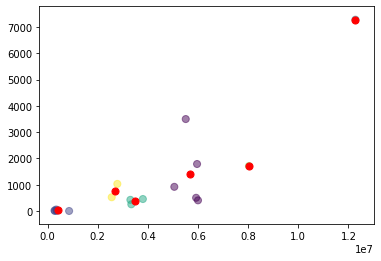

Death/Recovered


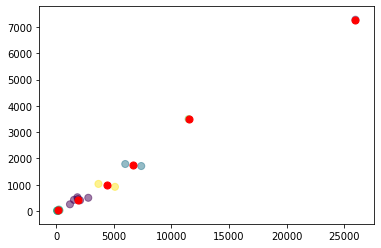

regions-france-2020-06-11.json
Death/Total


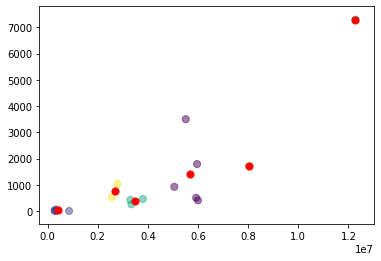

Death/Recovered


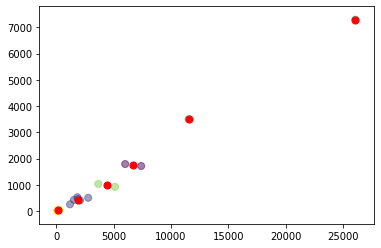

regions-france-2020-06-12.json
Death/Total


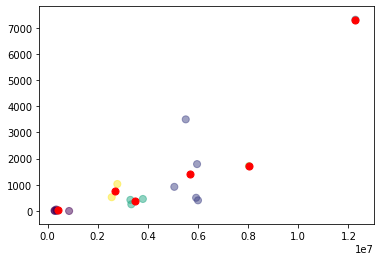

Death/Recovered


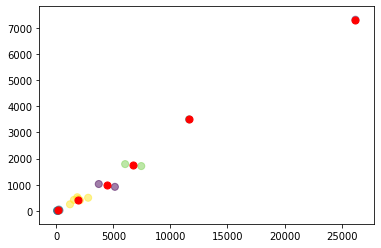

regions-france-2020-06-13.json
Death/Total


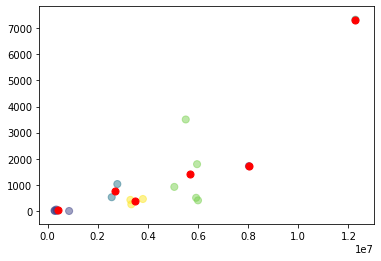

Death/Recovered


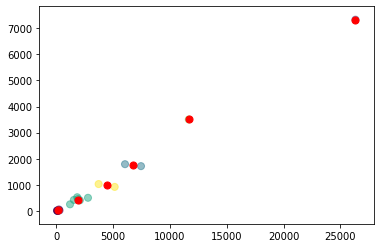

regions-france-2020-06-14.json
Death/Total


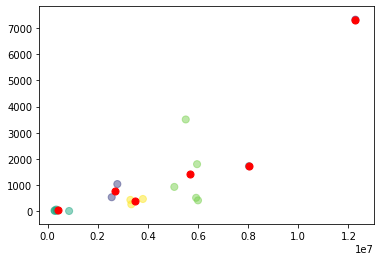

Death/Recovered


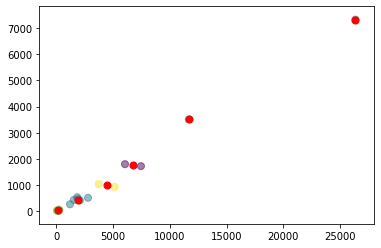

regions-france-2020-06-15.json
Death/Total


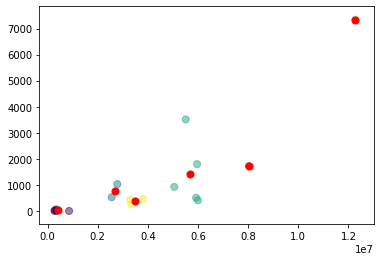

Death/Recovered


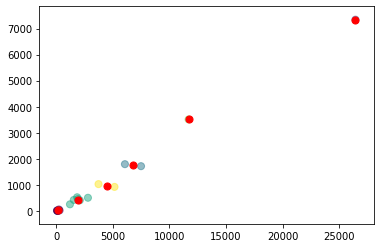

regions-france-2020-06-16.json
Death/Total


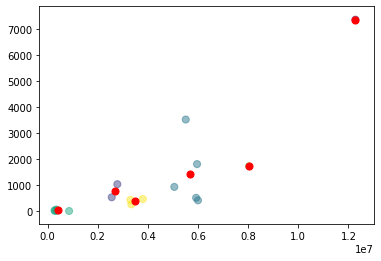

Death/Recovered


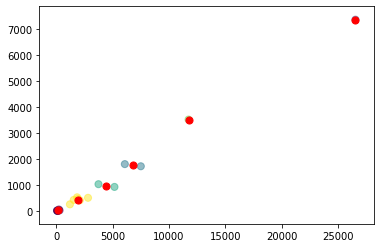

regions-france-2020-06-17.json
Death/Total


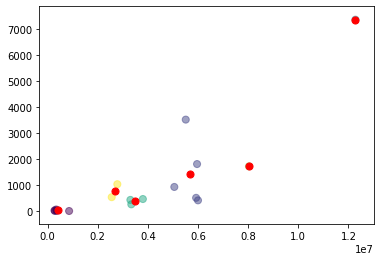

Death/Recovered


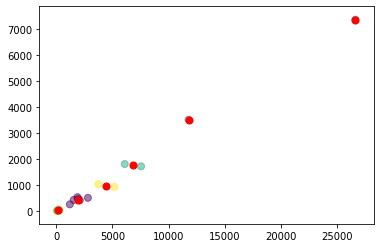

regions-france-2020-06-18.json
Death/Total


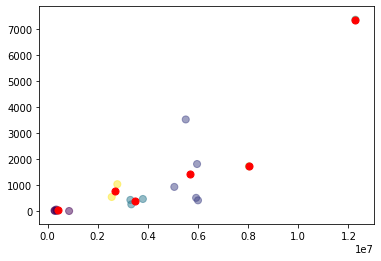

Death/Recovered


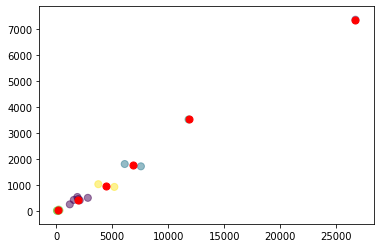

regions-france-2020-06-19.json
Death/Total


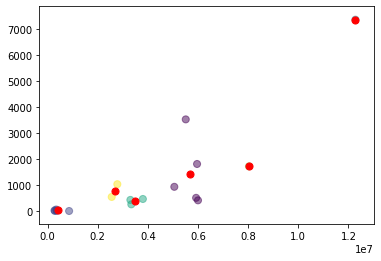

Death/Recovered


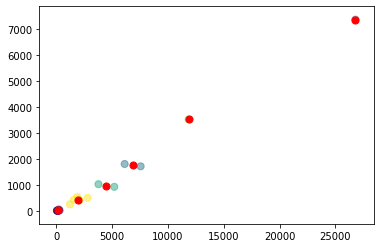

regions-france-2020-06-20.json
Death/Total


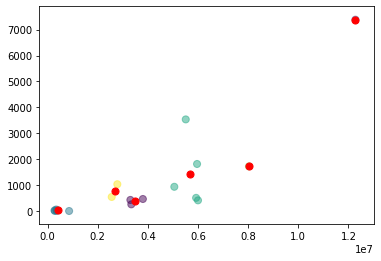

Death/Recovered


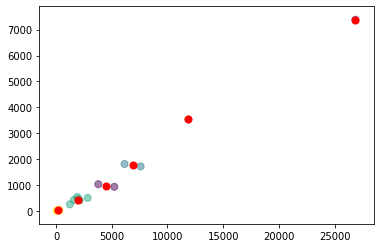

regions-france-2020-06-21.json
Death/Total


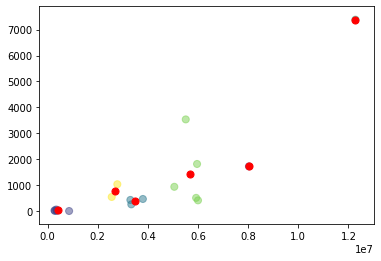

Death/Recovered


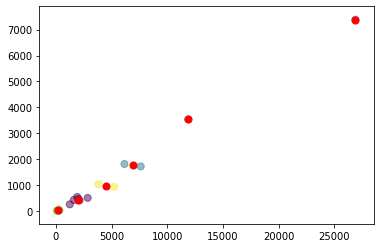

In [5]:
path_to_json = 'regions-france/'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
for files in json_files:
    with open("regions-france/"+files, 'r') as f:
            datastore = json.load(f)
            fileName = files
            CreateJsonFileNormalised(datastore, files)

Death/Total


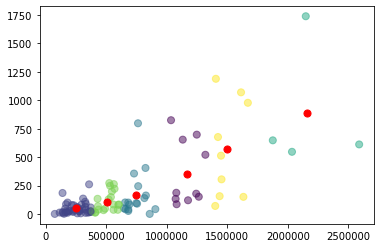

Death/Recovered


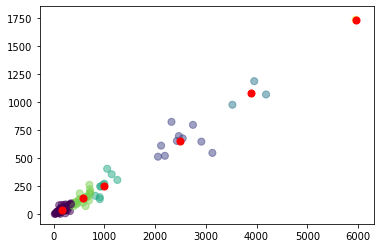

In [6]:
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=6, init='k-means++')
kmeans.fit(tab[['properties.Population.Total', 'properties.Deaths']])
centroids = kmeans.cluster_centers_
plt.scatter(tab['properties.Population.Total'], tab['properties.Deaths'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
print("Death/Total")
plt.show()

kmeans = KMeans(n_clusters=6, init='k-means++')
kmeans.fit(tab[['properties.Recovered', 'properties.Deaths']])
centroids = kmeans.cluster_centers_
plt.scatter(tab['properties.Recovered'], tab['properties.Deaths'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
print("Death/Recovered")
plt.show()
